In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import os
matplotlib.use('Agg')
%matplotlib inline
from gather_metrics import *
import pandas as pd
pd.set_option('precision', 4)
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

model_directory = '../../../job_results_small/'
class_dirs = [model_directory+'/random_forest/stage_2/',
              model_directory+'/irv/stage_2/',
              model_directory+'/neural_networks/stage_2/',
              model_directory+'/docking/stage_2/',
              model_directory+'/baseline/stage_2/']
k = 5

In [2]:
#setup gather matrix
gather_df = gather_dir_metrics(class_dirs[0], 1)     
gather_df = gather_df.append(gather_dir_metrics(class_dirs[1], 1))   
gather_df = gather_df.append(gather_dir_metrics(class_dirs[2], 1))
gather_df = gather_df.append(gather_dir_metrics(class_dirs[3], 1))
gather_df = gather_df.append(gather_dir_metrics(class_dirs[4], 1))

col_indices = list(range(10)) + list(range(15, 20)) + list(range(25, 65)) + list(range(145, 149)) + list(range(150, 183))
col_indices = [i for i in col_indices if 'Mean' not in gather_df.columns[i] and 'Median' not in gather_df.columns[i]]
col_indices = [i for i in col_indices if 'PriA-SSB AS' in gather_df.columns[i]]
metric_names = list(gather_df.columns.values[col_indices])

gather_df = gather_df[metric_names]
gather_df = gather_df.dropna(axis=0)

#setup comparison matrix and overlaps
mm_comp_dicts = get_mean_median_comps(gather_df, col_indices=[i for i in range(len(metric_names))])
agg_comp_dict = get_agg_comp(mm_comp_dicts, None, mean_w=1, median_w=0, tukey_w=0)
overlapping_models = get_overlap(agg_comp_dict, N=1)

---
## Model Ordering by Metric (Best-to-Worst)
Shows table with model-winscore pairs in the cells.

In [3]:
ordered_df = get_model_ordering(agg_comp_dict, metric_names)
ordered_df

,ROC AUC PriA-SSB AS,BEDROC AUC PriA-SSB AS,PR auc.integral PriA-SSB AS,NEF_0.1 % PriA-SSB AS,NEF_0.15 % PriA-SSB AS,NEF_0.5 % PriA-SSB AS,NEF_1 % PriA-SSB AS,NEF_2 % PriA-SSB AS,NEF_5 % PriA-SSB AS,NEF_10 % PriA-SSB AS,NEF_20 % PriA-SSB AS,NEF AUC PriA-SSB AS,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
0,"SingleRegression_a, 1.0","RandomForest_h, 1.0","RandomForest_h, 1.0","SingleClassification_b, 1.0","RandomForest_g, 1.0","RandomForest_h, 1.0","RandomForest_h, 1.0","RandomForest_h, 1.0","IRV_e, 1.0","RandomForest_h, 1.0","SingleRegression_a, 1.0","RandomForest_h, 1.0","RandomForest_h, 1.0","RandomForest_h, 1.0","RandomForest_h, 1.0","RandomForest_g, 1.0","RandomForest_f, 1.0","SingleRegression_a, 1.0","SingleRegression_a, 1.0"
1,"SingleRegression_b, 2.0","RandomForest_g, 2.0","RandomForest_g, 2.0","RandomForest_h, 1.0","RandomForest_h, 2.0","RandomForest_g, 1.0","RandomForest_g, 2.0","RandomForest_g, 1.0","RandomForest_g, 1.0","RandomForest_f, 1.0","RandomForest_f, 2.0","RandomForest_g, 2.0","RandomForest_g, 1.0","RandomForest_g, 2.0","RandomForest_g, 1.0","RandomForest_e, 1.0","SingleRegression_a, 2.0","RandomForest_f, 2.0","SingleRegression_b, 1.0"
2,"RandomForest_h, 3.0","RandomForest_e, 3.0","RandomForest_d, 3.0","RandomForest_g, 1.0","SingleClassification_b, 3.0","RandomForest_a, 3.0","RandomForest_e, 3.0","RandomForest_b, 3.0","RandomForest_b, 3.0","SingleRegression_a, 3.0","RandomForest_c, 2.0","RandomForest_d, 2.0","RandomForest_e, 3.0","RandomForest_e, 3.0","RandomForest_b, 3.0","RandomForest_d, 1.0","RandomForest_h, 2.0","RandomForest_c, 2.0","RandomForest_h, 3.0"
3,"RandomForest_f, 4.0","RandomForest_d, 3.0","RandomForest_e, 4.0","MultiClassification_a, 4.0","RandomForest_d, 4.0","RandomForest_b, 4.0","RandomForest_c, 3.0","RandomForest_a, 3.0","RandomForest_h, 3.0","RandomForest_e, 3.0","RandomForest_d, 4.0","RandomForest_e, 4.0","RandomForest_d, 3.0","RandomForest_c, 3.0","RandomForest_a, 3.0","SingleRegression_a, 4.0","RandomForest_e, 2.0","RandomForest_d, 4.0","RandomForest_e, 4.0"
4,"RandomForest_e, 5.0","SingleRegression_a, 5.0","SingleClassification_b, 5.0","RandomForest_f, 4.0","RandomForest_e, 4.0","RandomForest_e, 4.0","RandomForest_b, 3.0","RandomForest_e, 3.0","RandomForest_a, 3.0","RandomForest_d, 3.0","SingleRegression_b, 5.0","SingleRegression_a, 5.0","RandomForest_c, 5.0","RandomForest_b, 3.0","RandomForest_e, 3.0","IRV_e, 4.0","RandomForest_d, 2.0","SingleRegression_b, 5.0","RandomForest_g, 5.0"
5,"RandomForest_d, 6.0","RandomForest_c, 6.0","RandomForest_c, 6.0","RandomForest_d, 6.0","MultiClassification_a, 4.0","RandomForest_d, 4.0","RandomForest_a, 3.0","RandomForest_c, 3.0","RandomForest_e, 3.0","SingleRegression_b, 6.0","RandomForest_g, 5.0","RandomForest_c, 6.0","SingleClassification_b, 6.0","RandomForest_a, 3.0","RandomForest_c, 3.0","RandomForest_h, 4.0","SingleRegression_b, 6.0","RandomForest_g, 5.0","RandomForest_f, 5.0"
6,"RandomForest_c, 7.0","RandomForest_b, 7.0","RandomForest_b, 7.0","RandomForest_a, 6.0","RandomForest_c, 4.0","RandomForest_c, 4.0","RandomForest_d, 7.0","SingleRegression_a, 7.0","RandomForest_d, 3.0","IRV_e, 6.0","RandomForest_e, 5.0","RandomForest_a, 7.0","RandomForest_b, 6.0","RandomForest_d, 7.0","SingleRegression_a, 7.0","RandomForest_a, 4.0","IRV_e, 6.0","RandomForest_e, 5.0","RandomForest_d, 5.0"
7,"RandomForest_g, 8.0","RandomForest_a, 8.0","RandomForest_a, 8.0","RandomForest_e, 6.0","RandomForest_b, 4.0","SingleClassification_b, 8.0","SingleClassification_b, 8.0","RandomForest_d, 7.0","SingleRegression_a, 8.0","RandomForest_g, 6.0","RandomForest_a, 8.0","RandomForest_b, 7.0","RandomForest_a, 6.0","SingleClassification_b, 8.0","RandomForest_d, 7.0","RandomForest_b, 8.0","RandomForest_g, 6.0","RandomForest_a, 8.0","RandomForest_c, 5.0"
8,"IRV_e, 9.0","IRV_e, 9.0","SingleRegression_b, 9.0","RandomForest_c, 6.0","RandomForest_f, 9.0","baseline

---
## Metrics Most Similar to N-Hits

In [4]:
get_similar_to_nhits(agg_comp_dict, metric_names[:-7], metric_names[-7:])

,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
0,NEF_1 %,NEF_1 %,NEF_2 %,NEF_5 %,NEF_10 %,NEF_20 %,ROC AUC
1,NEF_0.15 %,NEF_0.5 %,NEF_0.5 %,NEF_2 %,BEDROC AUC,ROC AUC,NEF_20 %
2,NEF_0.5 %,NEF_2 %,NEF_5 %,BEDROC AUC,NEF AUC,NEF_10 %,NEF_10 %
3,NEF_2 %,NEF_5 %,NEF_1 %,NEF_10 %,NEF_5 %,NEF AUC,BEDROC AUC
4,PR auc.integral,NEF_0.15 %,BEDROC AUC,NEF AUC,ROC AUC,BEDROC AUC,NEF AUC
5,NEF_0.1 %,NEF_0.1 %,NEF AUC,NEF_1 %,NEF_20 %,NEF_0.15 %,NEF_0.15 %
6,NEF_5 %,PR auc.integral,NEF_10 %,NEF_0.5 %,NEF_2 %,NEF_2 %,PR auc.integral
7,NEF AUC,"BEDROC AUC, NEF AUC",NEF_0.15 %,NEF_0.15 %,NEF_0.15 %,PR auc.integral,NEF_0.1 %
8,BEDROC AUC,NEF_10 %,NEF_0.1 %,PR auc.integral,"PR auc.integral, NEF_1 %",NEF_5 %,NEF_2 %
9,NEF_10 %,NEF_20 %,PR auc.integral,"NEF_0.1 %, NEF_20 %",NEF_0.1 %,NEF_0.1 %,"NEF_1 %, NEF_5 %"


---
## Overlapping top N models over all metrics

In [5]:
get_overlap(agg_comp_dict, N=1)

,overlap_perc
RandomForest_h,0.5789
RandomForest_g,0.4211
SingleRegression_a,0.2105
RandomForest_f,0.1053
SingleClassification_b,0.0526
IRV_e,0.0526
RandomForest_e,0.0526
RandomForest_d,0.0526
SingleRegression_b,0.0526


In [6]:
get_overlap(agg_comp_dict, N=5)

,overlap_perc
RandomForest_e,0.9474
RandomForest_h,0.8947
RandomForest_g,0.8421
RandomForest_d,0.6842
RandomForest_c,0.5263
SingleRegression_a,0.4737
RandomForest_b,0.4211
RandomForest_a,0.4211
RandomForest_f,0.3684
SingleRegression_b,0.2105


## Spearman's Rank-order correlation coefficient 

In [7]:
spearman_df, ordered_spearman_df = get_spearman_r(agg_comp_dict, metric_names[:-7], metric_names[-7:])

In [8]:
ordered_spearman_df

,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
0,NEF_0.5 %,NEF_1 %,NEF_2 %,NEF_5 %,NEF_10 %,NEF_20 %,ROC AUC
1,NEF_1 %,NEF_0.5 %,NEF_5 %,BEDROC AUC,NEF AUC,ROC AUC,NEF_20 %
2,NEF_2 %,NEF_2 %,NEF_1 %,NEF_2 %,BEDROC AUC,NEF_10 %,BEDROC AUC
3,NEF_0.15 %,NEF_5 %,NEF_0.5 %,NEF AUC,NEF_20 %,NEF AUC,NEF AUC
4,PR auc.integral,BEDROC AUC,BEDROC AUC,NEF_10 %,ROC AUC,BEDROC AUC,NEF_10 %
5,NEF_5 %,NEF AUC,NEF AUC,NEF_1 %,NEF_5 %,PR auc.integral,PR auc.integral
6,NEF AUC,PR auc.integral,NEF_10 %,NEF_0.5 %,NEF_2 %,NEF_5 %,NEF_2 %
7,BEDROC AUC,NEF_0.15 %,PR auc.integral,PR auc.integral,PR auc.integral,NEF_2 %,NEF_5 %
8,NEF_0.1 %,NEF_10 %,NEF_0.15 %,ROC AUC,NEF_1 %,NEF_1 %,NEF_1 %
9,NEF_10 %,NEF_0.1 %,ROC AUC,NEF_20 %,NEF_0.15 %,NEF_0.15 %,NEF_0.15 %


In [9]:
spearman_df

,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
ROC AUC,0.8439,0.8543,0.8985,0.9227,0.9626,0.9802,0.9739
BEDROC AUC,0.9232,0.9391,0.9612,0.9742,0.9739,0.9570,0.9479
PR auc.integral,0.9401,0.9377,0.9311,0.9296,0.9295,0.9162,0.9218
NEF_0.1 %,0.9228,0.8826,0.8753,0.8411,0.8521,0.8204,0.8257
NEF_0.15 %,0.9524,0.9115,0.9073,0.8757,0.8707,0.8445,0.8466
NEF_0.5 %,0.9781,0.9760,0.9639,0.9330,0.8675,0.8188,0.8246
NEF_1 %,0.9664,1.0000,0.9675,0.9456,0.8976,0.8538,0.8616
NEF_2 %,0.9534,0.9675,1.0000,0.9738,0.9360,0.8942,0.8935
NEF_5 %,0.9289,0.9477,0.9719,0.9884,0.9475,0.9001,0.8934
NEF_10 %,0.8928,0.9033,0.9411,0.9557,0.9984,0.9606,0.9417


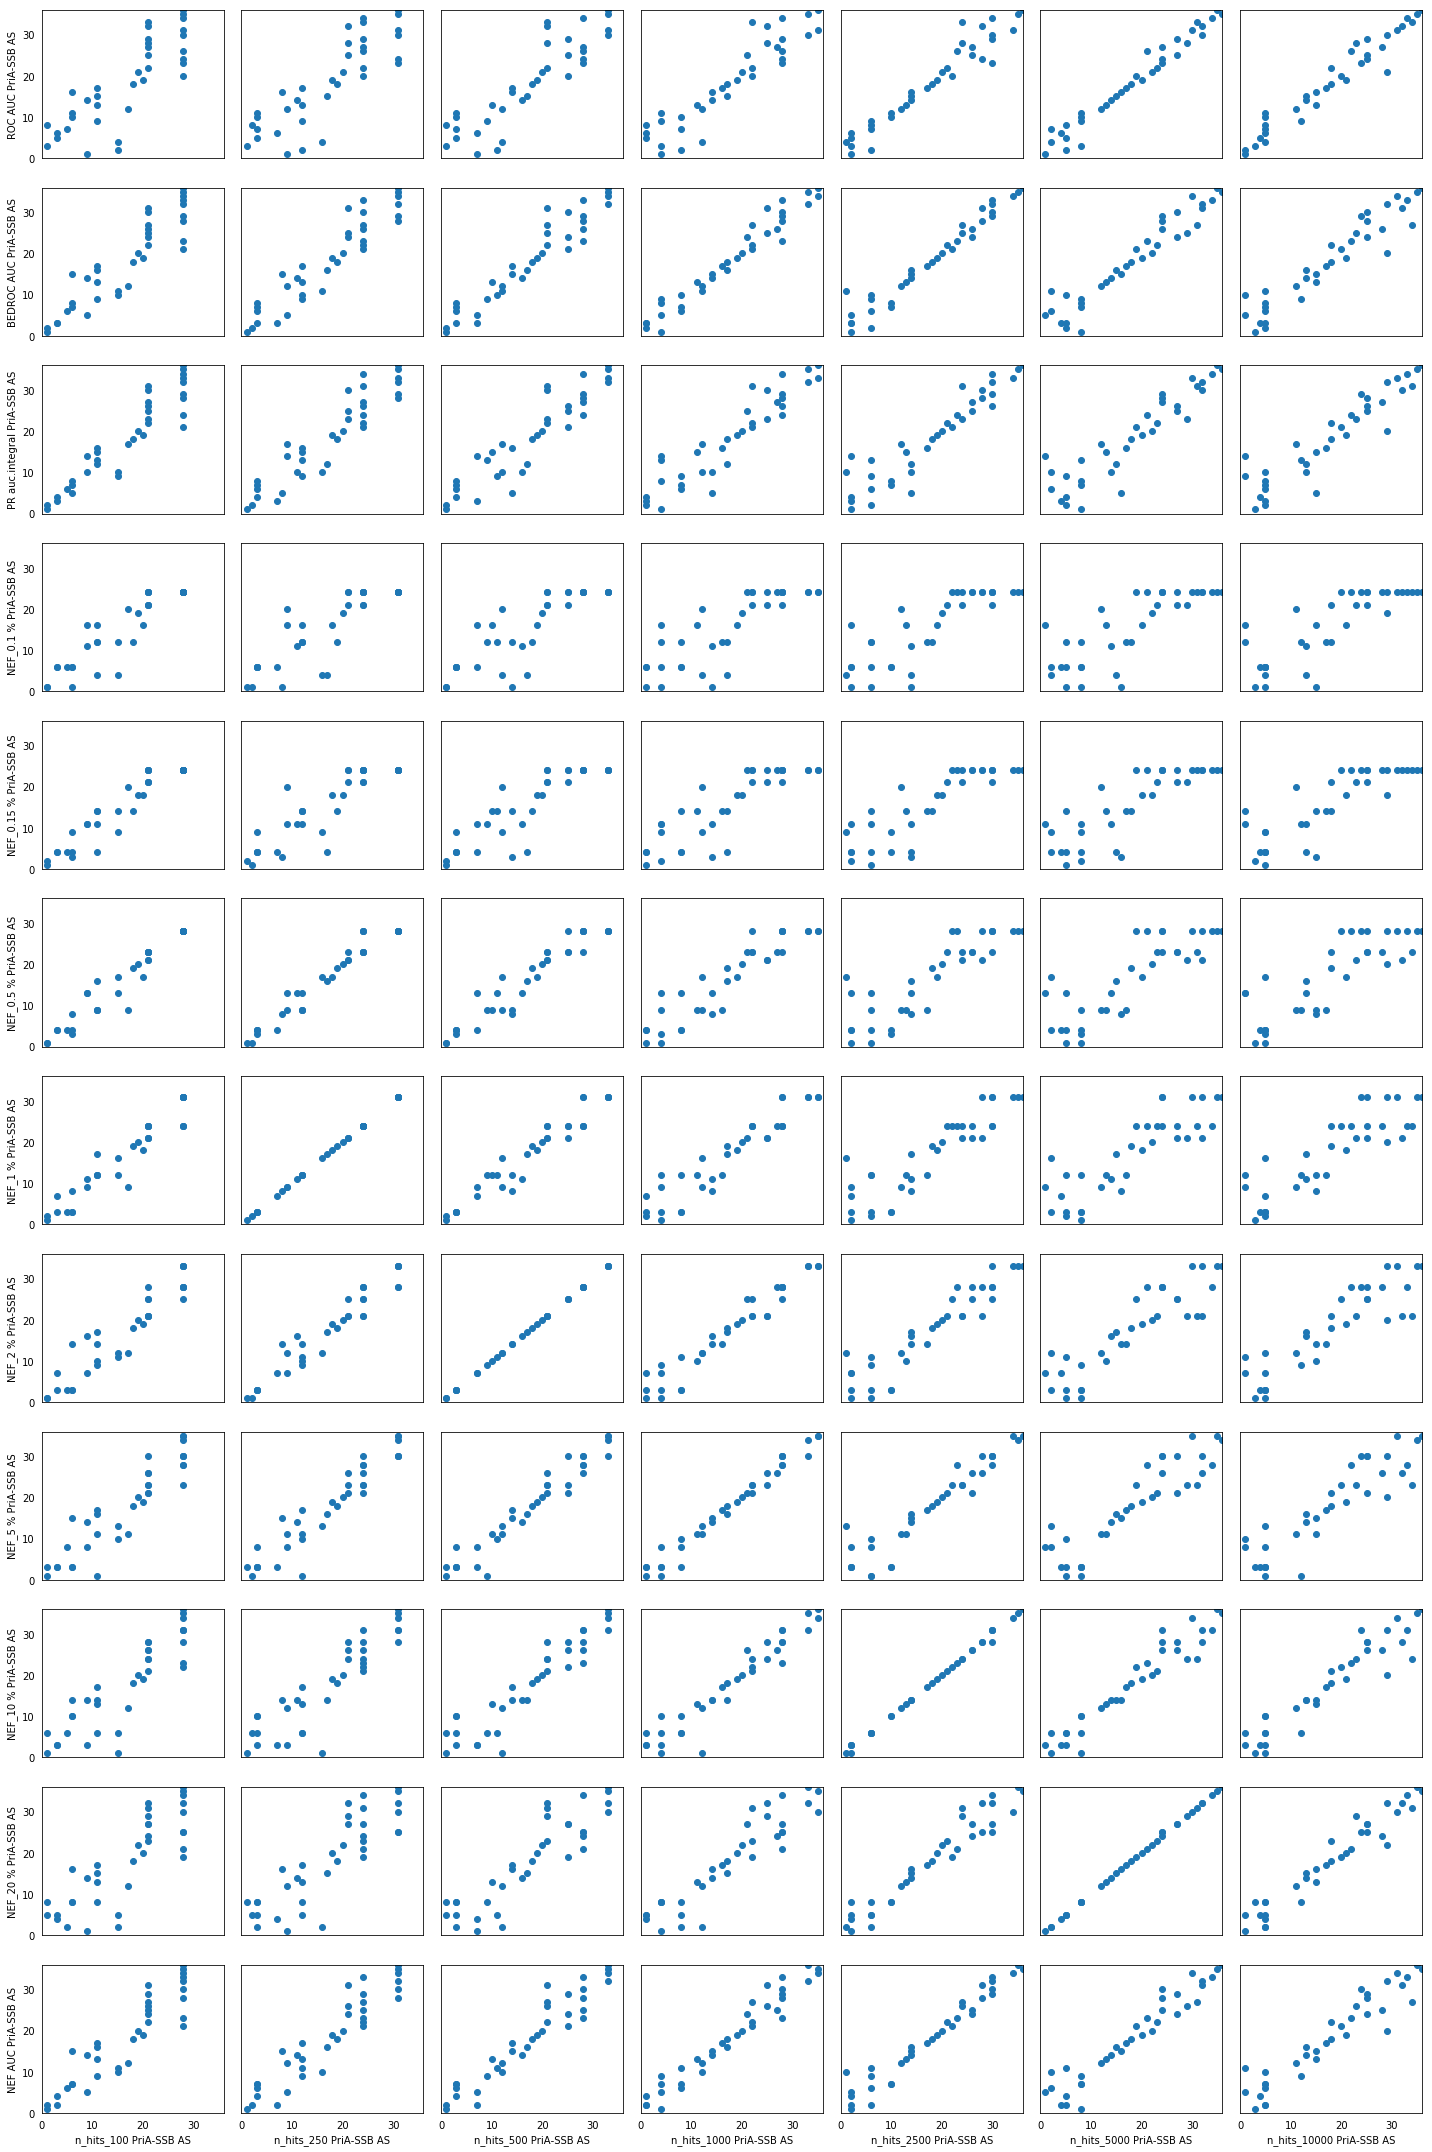

In [10]:
labels=['PriA-SSB AS']
matplotlib.rcParams.update({'font.size': 10})
if not os.path.exists('./cv_ps_figures/ps_scatter_plots_nhits/'):
    os.makedirs('./cv_ps_figures/ps_scatter_plots_nhits/')
for l in labels:
    curr_metrics = [m for m in metric_names[:-7] if l in m]
    curr_hits = [m for m in metric_names[-7:] if l in m]
    file_name = './cv_ps_figures/ps_scatter_plots_nhits/' + l.replace(' ', '_') + '.png'
    plot_scatter_nhits_alt(agg_comp_dict, curr_metrics, curr_hits, file_name, figsize=(20,30))

## Metric Scores and Plots

In [11]:
get_model_ordering_mscores(gather_df, metric_names)

,ROC AUC PriA-SSB AS,BEDROC AUC PriA-SSB AS,PR auc.integral PriA-SSB AS,NEF_0.1 % PriA-SSB AS,NEF_0.15 % PriA-SSB AS,NEF_0.5 % PriA-SSB AS,NEF_1 % PriA-SSB AS,NEF_2 % PriA-SSB AS,NEF_5 % PriA-SSB AS,NEF_10 % PriA-SSB AS,NEF_20 % PriA-SSB AS,NEF AUC PriA-SSB AS,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
0,"SingleRegression_a, 0.9191","RandomForest_h, 0.7321","RandomForest_h, 0.3191","SingleClassification_b, 0.56","RandomForest_g, 0.5946","RandomForest_g, 0.5323","RandomForest_h, 0.6452","RandomForest_g, 0.6774","RandomForest_g, 0.7419","RandomForest_f, 0.7903","SingleRegression_a, 0.8548","RandomForest_h, 0.7487","RandomForest_g, 31.0","RandomForest_h, 40.0","RandomForest_g, 42.0","RandomForest_d, 45.0","RandomForest_f, 49.0","SingleRegression_a, 53.0","SingleRegression_b, 58.0"
1,"SingleRegression_b, 0.9034","RandomForest_g, 0.73","RandomForest_g, 0.3164","RandomForest_g, 0.56","RandomForest_h, 0.5676","RandomForest_h, 0.5323","RandomForest_g, 0.629","RandomForest_h, 0.6774","IRV_e, 0.7419","RandomForest_h, 0.7903","RandomForest_c, 0.8387","RandomForest_d, 0.7436","RandomForest_h, 31.0","RandomForest_g, 39.0","RandomForest_h, 42.0","RandomForest_e, 45.0","SingleRegression_a, 48.0","RandomForest_c, 52.0","SingleRegression_a, 58.0"
2,"RandomForest_h, 0.8846","RandomForest_e, 0.7259","RandomForest_d, 0.248","RandomForest_h, 0.56","SingleClassification_b, 0.5405","RandomForest_a, 0.5161","RandomForest_a, 0.6129","RandomForest_a, 0.6613","RandomForest_a, 0.7258","SingleRegression_a, 0.7742","RandomForest_f, 0.8387","RandomForest_g, 0.7436","RandomForest_d, 30.0","RandomForest_a, 38.0","RandomForest_a, 41.0","RandomForest_g, 45.0","RandomForest_d, 48.0","RandomForest_f, 52.0","RandomForest_h, 56.0"
3,"RandomForest_f, 0.8829","RandomForest_d, 0.7258","RandomForest_e, 0.2469","RandomForest_f, 0.52","RandomForest_b, 0.4324","RandomForest_b, 0.5","RandomForest_b, 0.6129","RandomForest_b, 0.6613","RandomForest_b, 0.7258","RandomForest_d, 0.7742","RandomForest_d, 0.8226","RandomForest_e, 0.7418","RandomForest_e, 30.0","RandomForest_b, 38.0","RandomForest_b, 41.0","RandomForest_a, 44.0","RandomForest_e, 48.0","RandomForest_d, 51.0","RandomForest_e, 54.0"
4,"RandomForest_e, 0.8813","SingleRegression_a, 0.7187","SingleClassification_b, 0.2442","MultiClassification_a, 0.52","RandomForest_c, 0.4324","RandomForest_c, 0.5","RandomForest_c, 0.6129","RandomForest_c, 0.6613","RandomForest_d, 0.7258","RandomForest_e, 0.7742","SingleRegression_b, 0.8065","SingleRegression_a, 0.7408","RandomForest_c, 28.0","RandomForest_c, 38.0","RandomForest_c, 41.0","SingleRegression_a, 44.0","RandomForest_h, 48.0","SingleRegression_b, 50.0","RandomForest_b, 53.0"
5,"RandomForest_d, 0.8778","RandomForest_c, 0.7177","RandomForest_c, 0.2437","RandomForest_a, 0.48","RandomForest_d, 0.4324","RandomForest_d, 0.5","RandomForest_e, 0.6129","RandomForest_e, 0.6613","RandomForest_e, 0.7258","SingleRegression_b, 0.7581","RandomForest_e, 0.8065","RandomForest_c, 0.7405","RandomForest_a, 27.0","RandomForest_e, 38.0","RandomForest_e, 41.0","RandomForest_h, 44.0","SingleRegression_b, 47.0","RandomForest_e, 50.0","RandomForest_c, 53.0"
6,"RandomForest_c, 0.875","RandomForest_b, 0.7102","RandomForest_b, 0.242","RandomForest_b, 0.48","RandomForest_e, 0.4324","RandomForest_e, 0.5","RandomForest_d, 0.5968","SingleRegression_a, 0.6452","RandomForest_h, 0.7258","RandomForest_c, 0.7581","RandomForest_g, 0.8065","RandomForest_a, 0.7257","RandomForest_b, 27.0","RandomForest_d, 37.0","SingleRegression_a, 40.0","IRV_e, 44.0","RandomForest_c, 47.0","RandomForest_g, 50.0","RandomForest_d, 53.0"
7,"RandomForest_g, 0.8713","RandomForest_a, 0.704","RandomForest_a, 0.2384","RandomForest_c, 0.48","MultiClassification_a, 0.4324","SingleClassification_b, 0.4516","SingleClassification_b, 0.5161","RandomForest_d, 0.6452","SingleRegression_a, 0.7097","RandomForest_g, 0.7581","Random

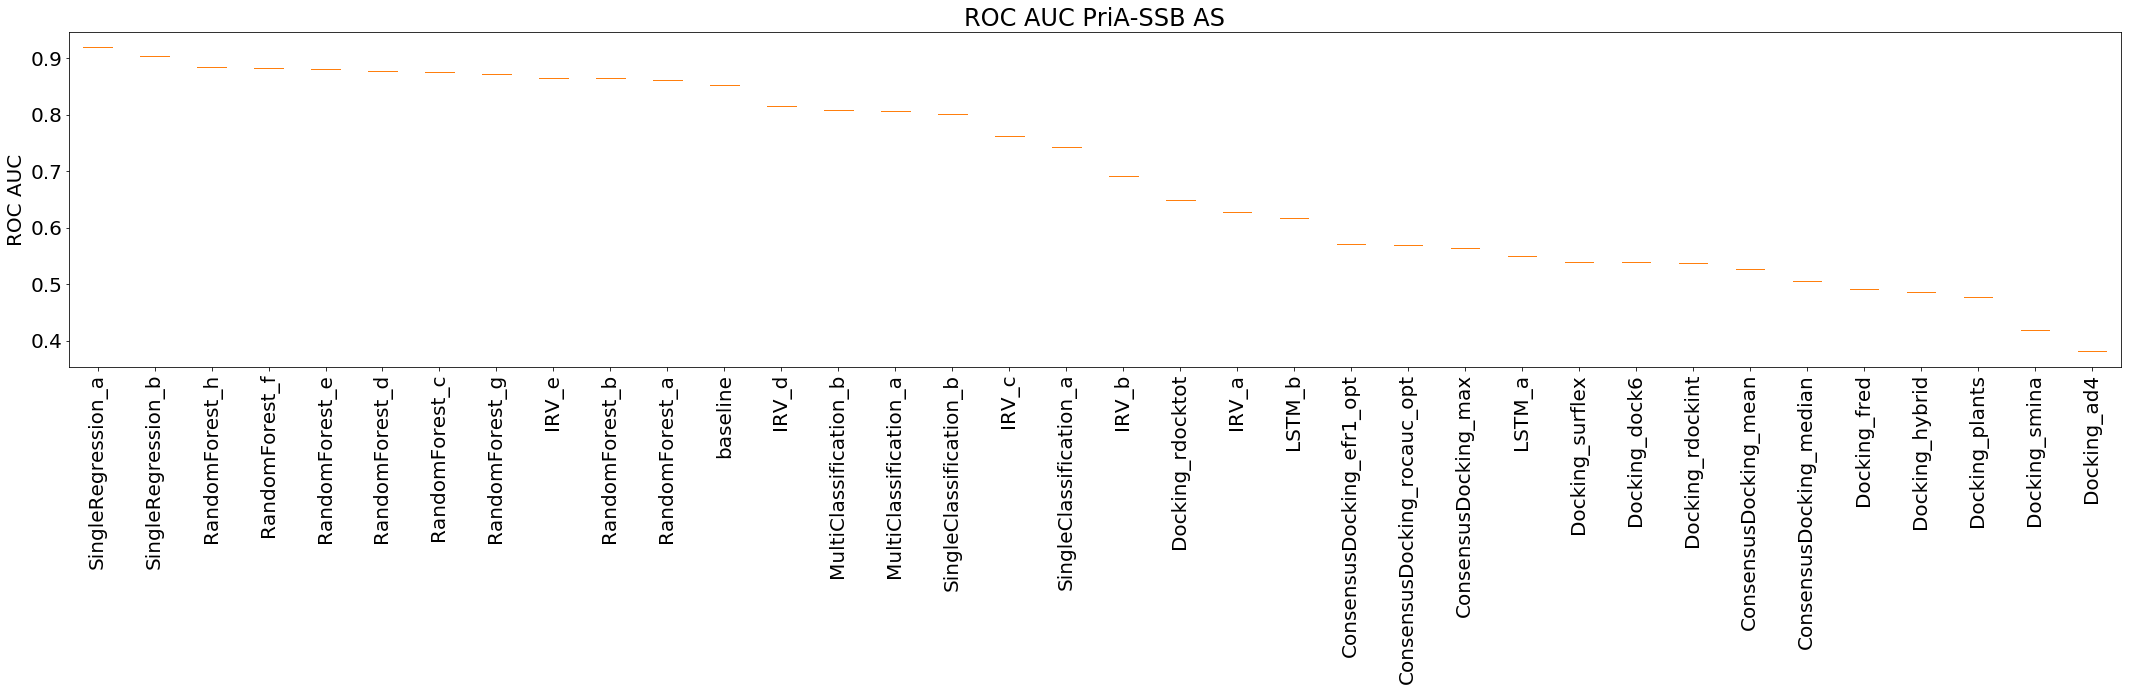

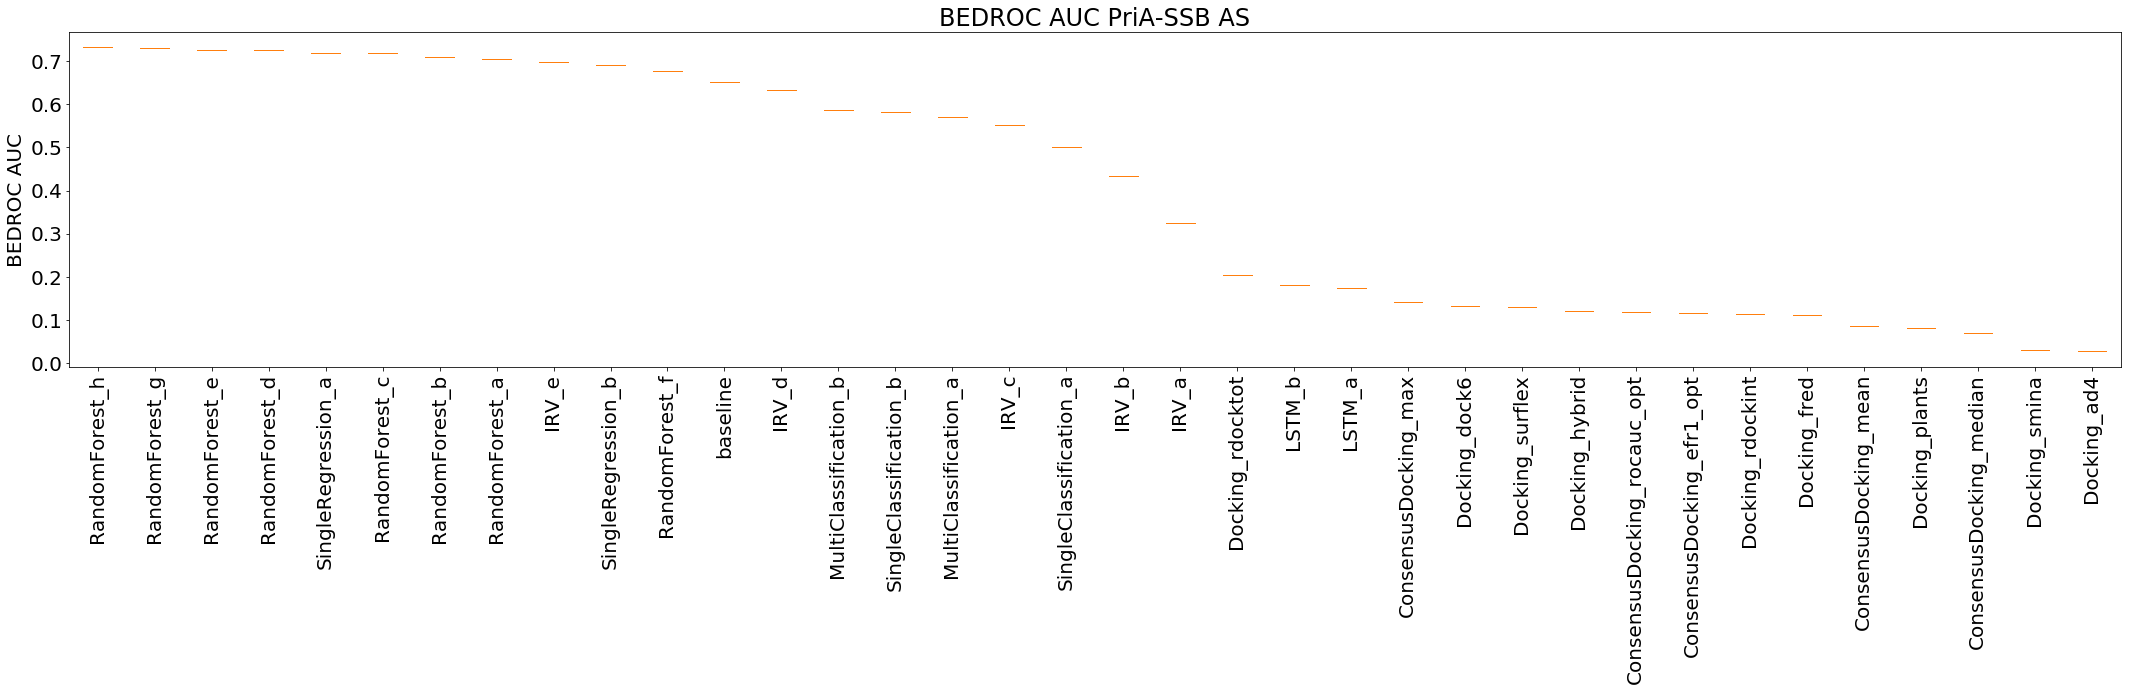

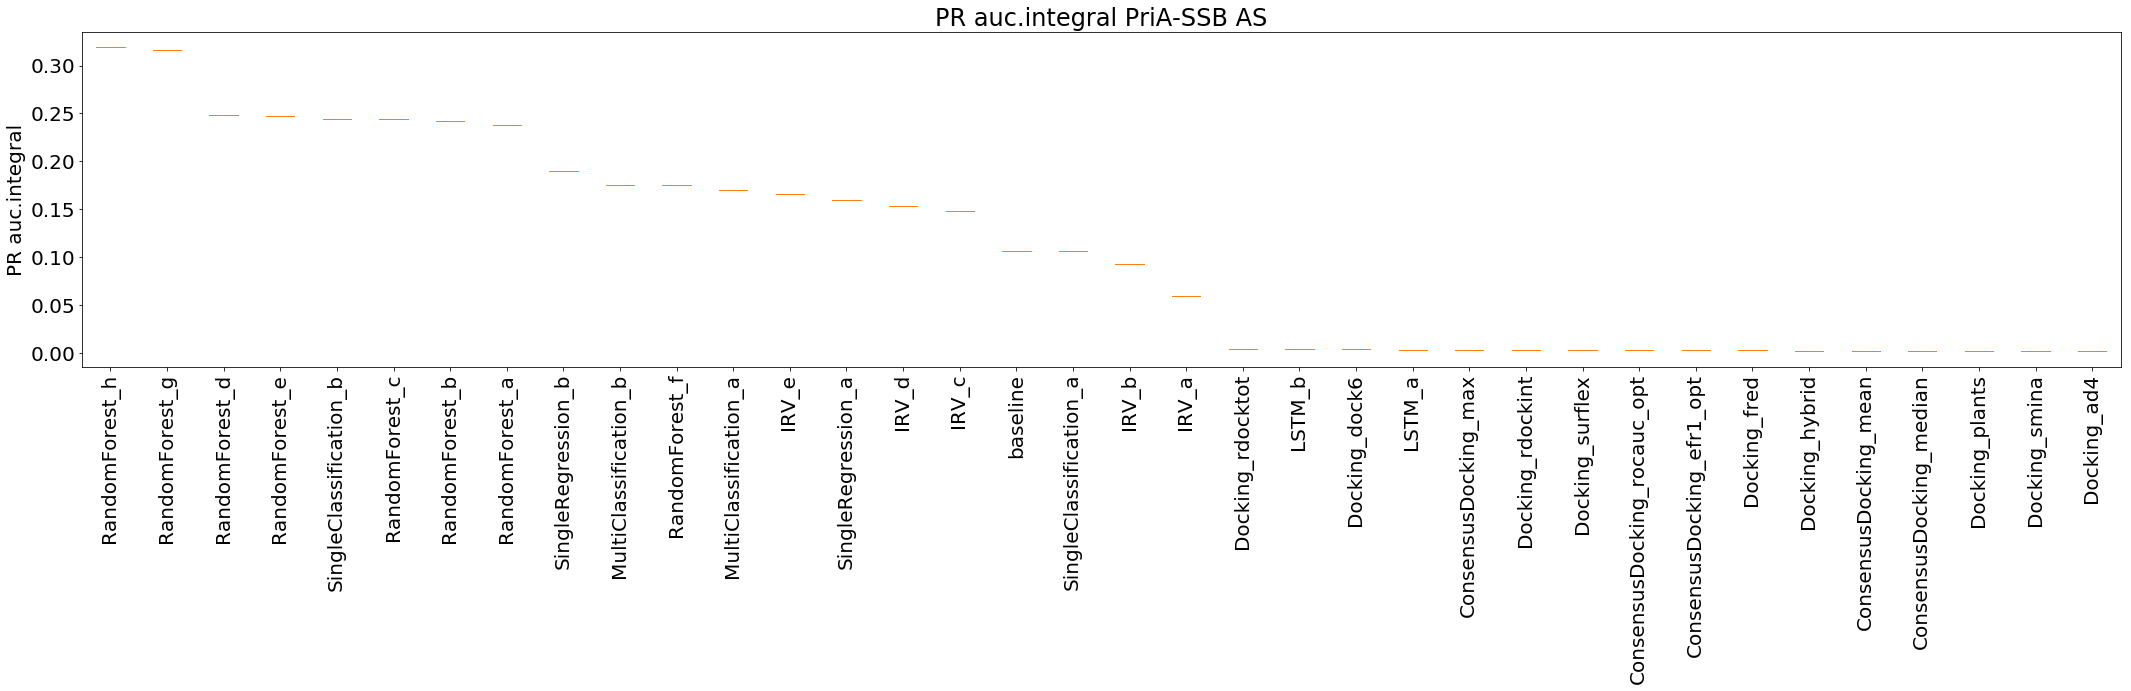

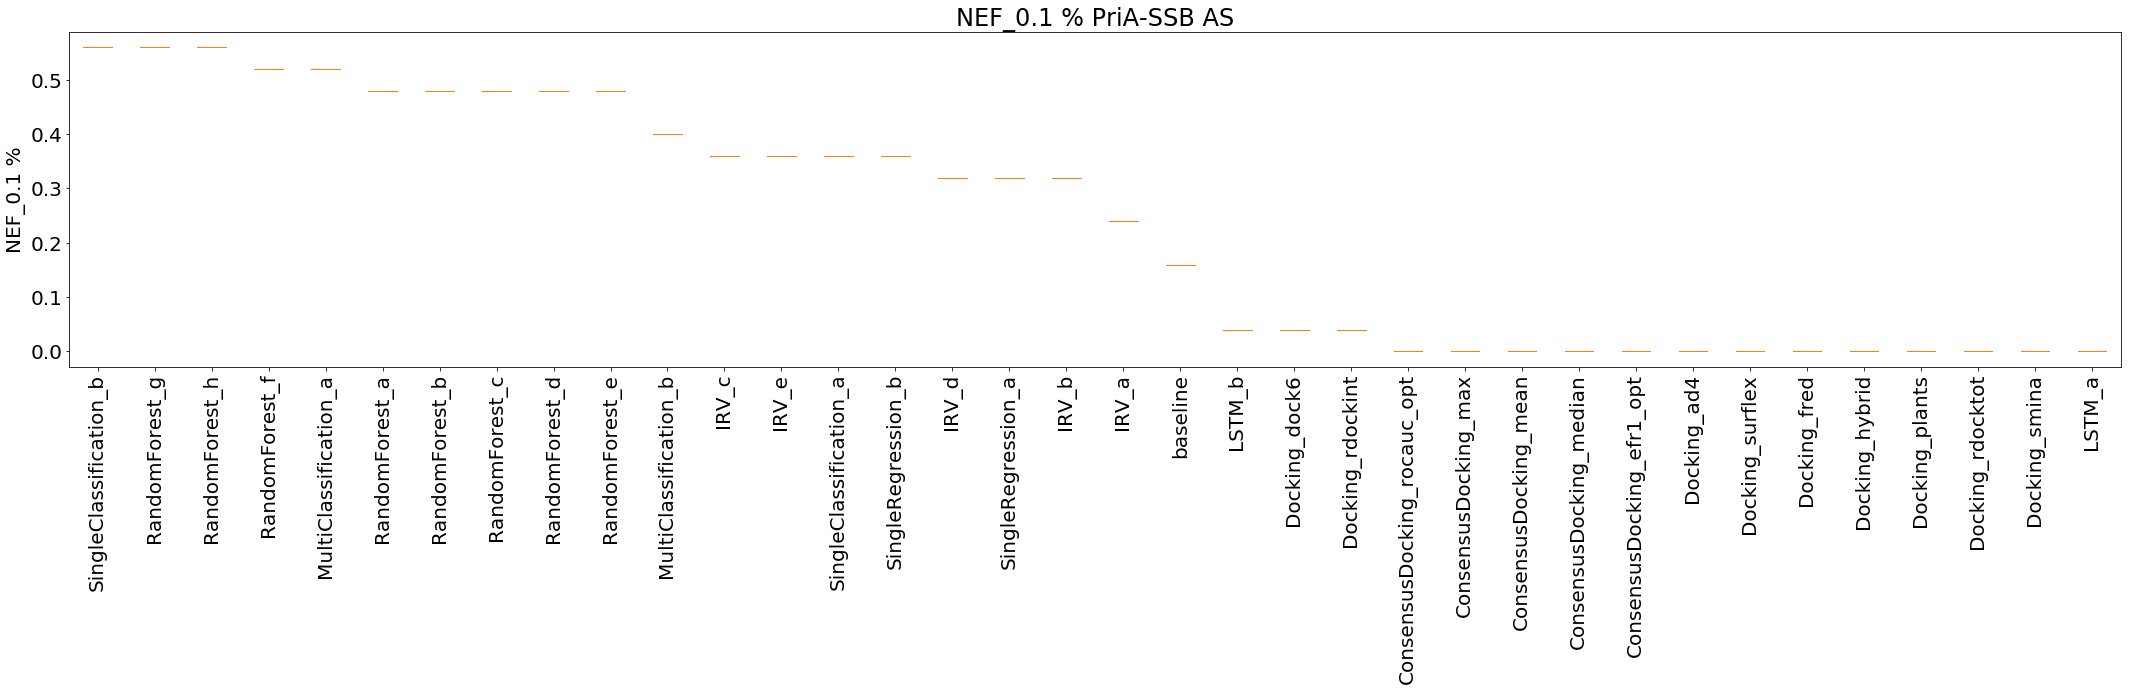

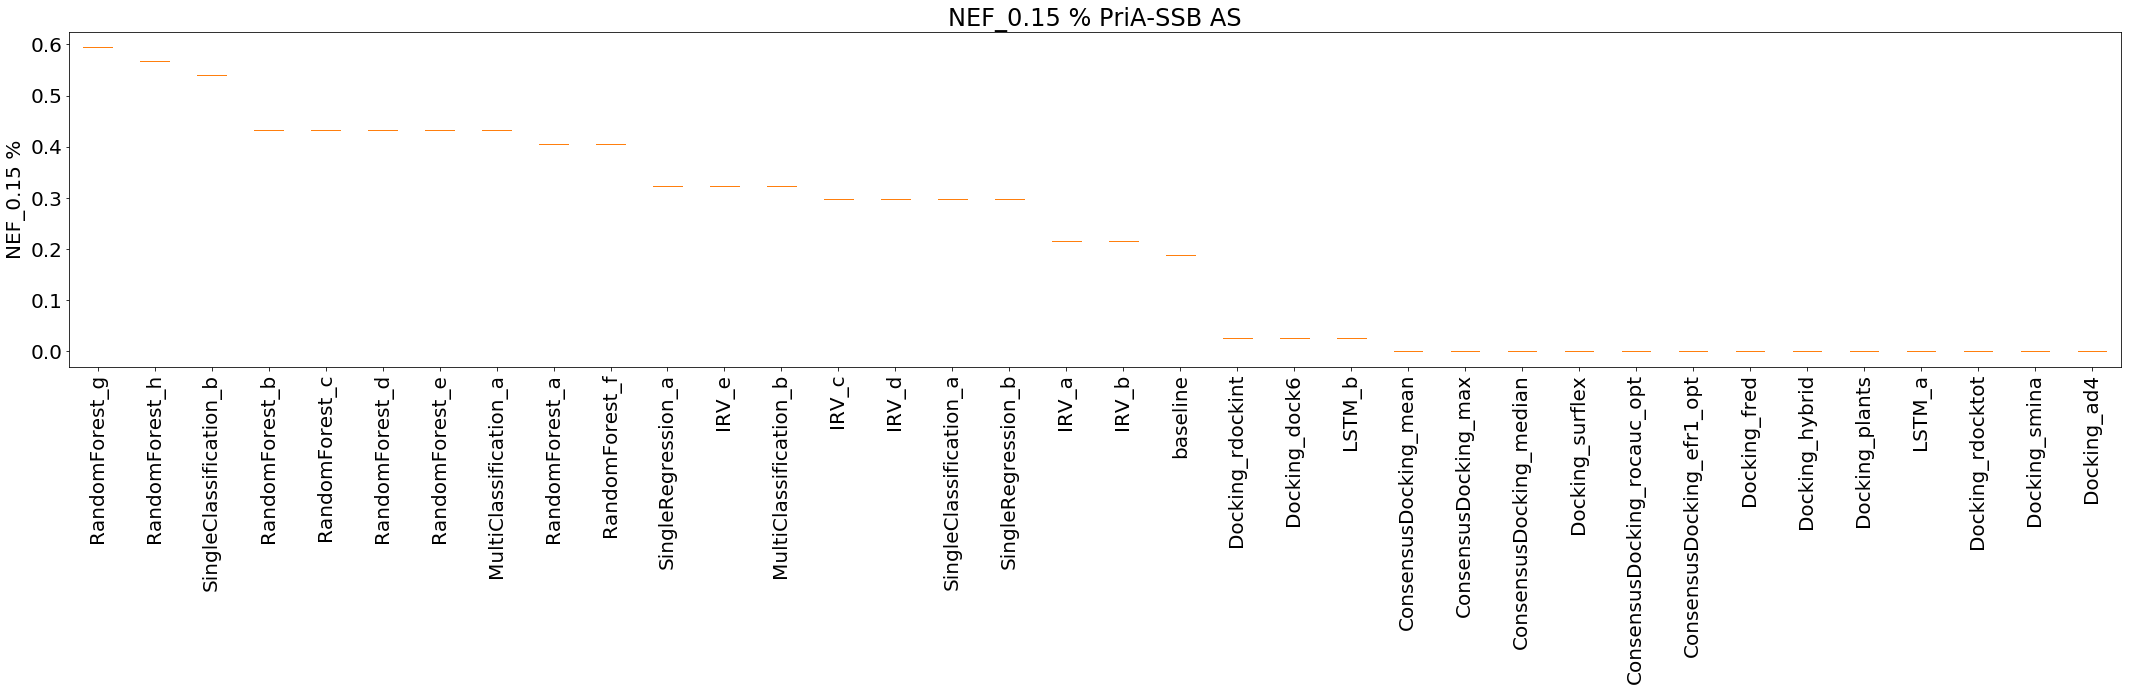

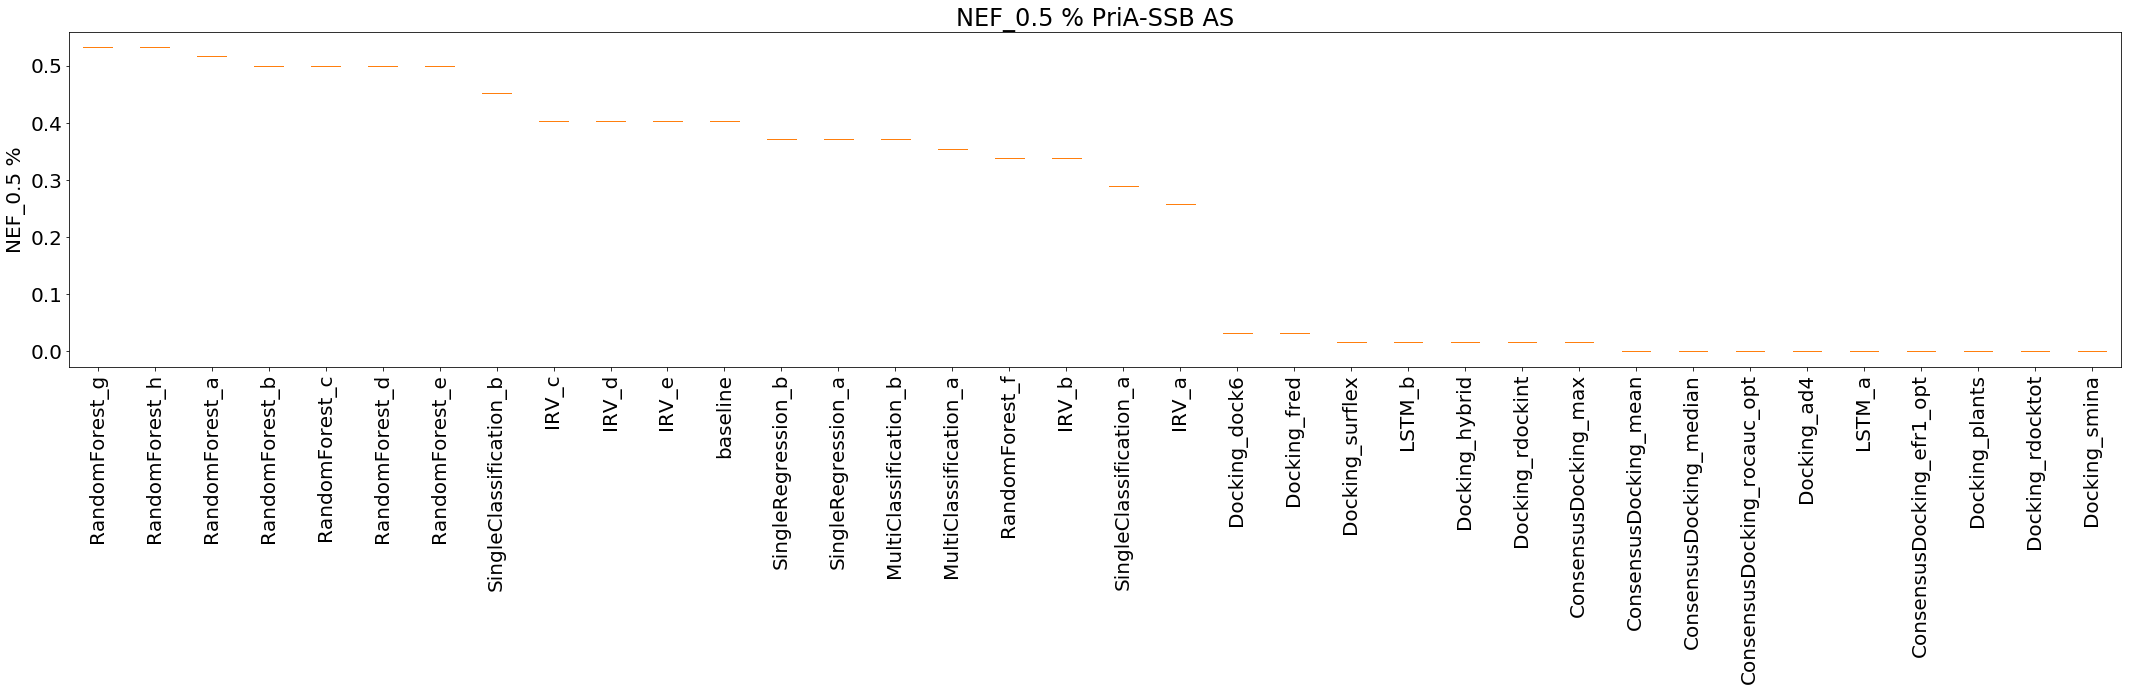

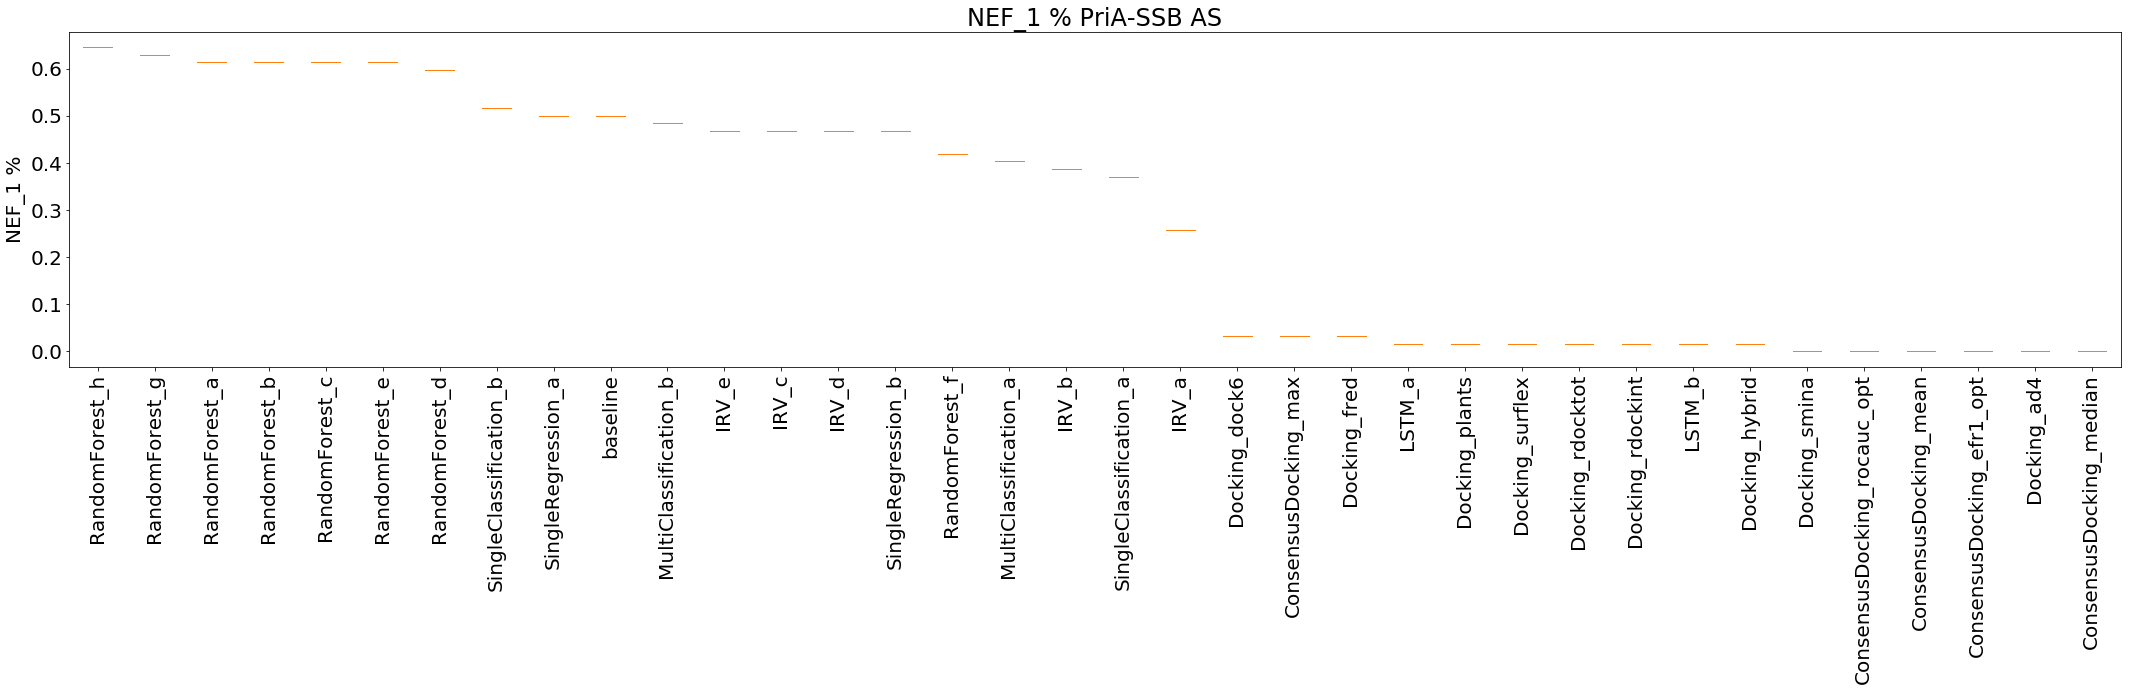

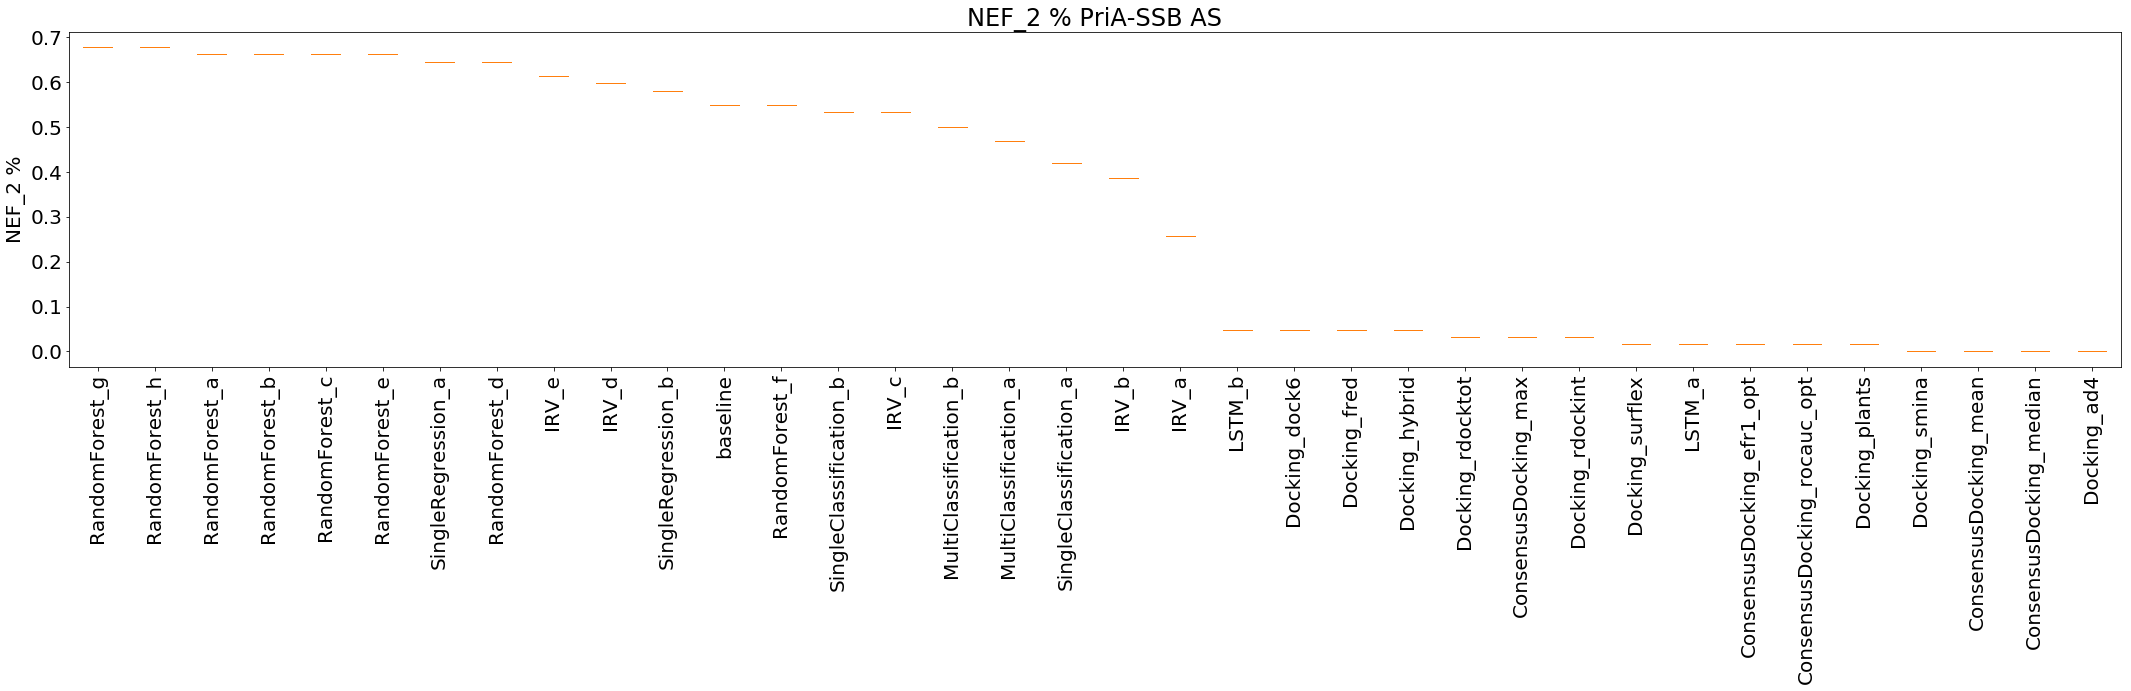

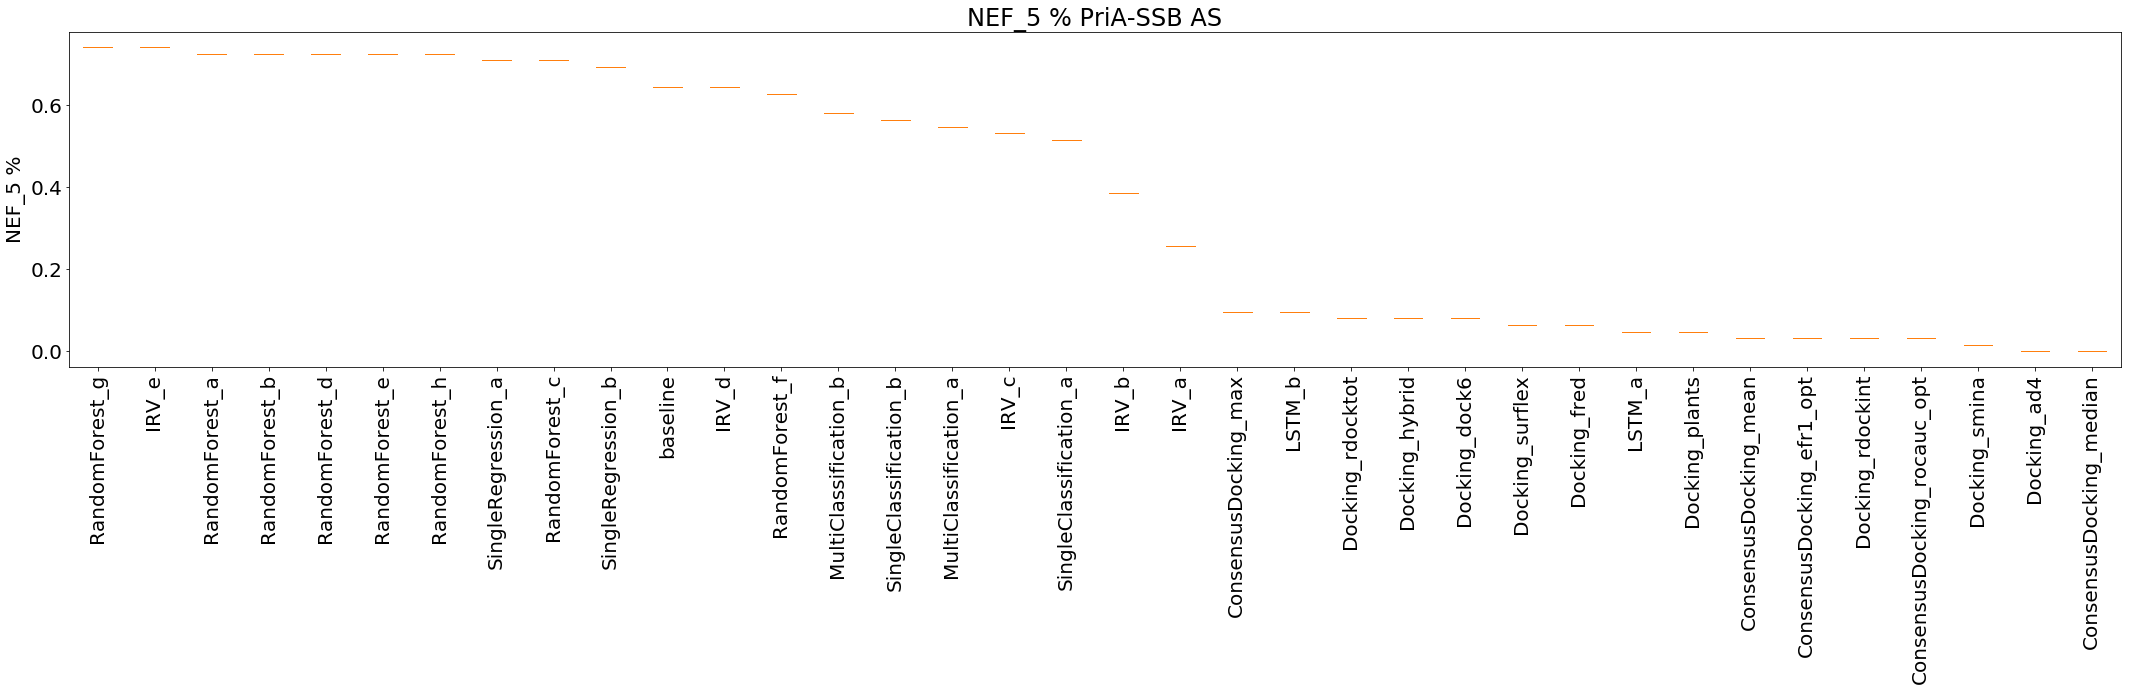

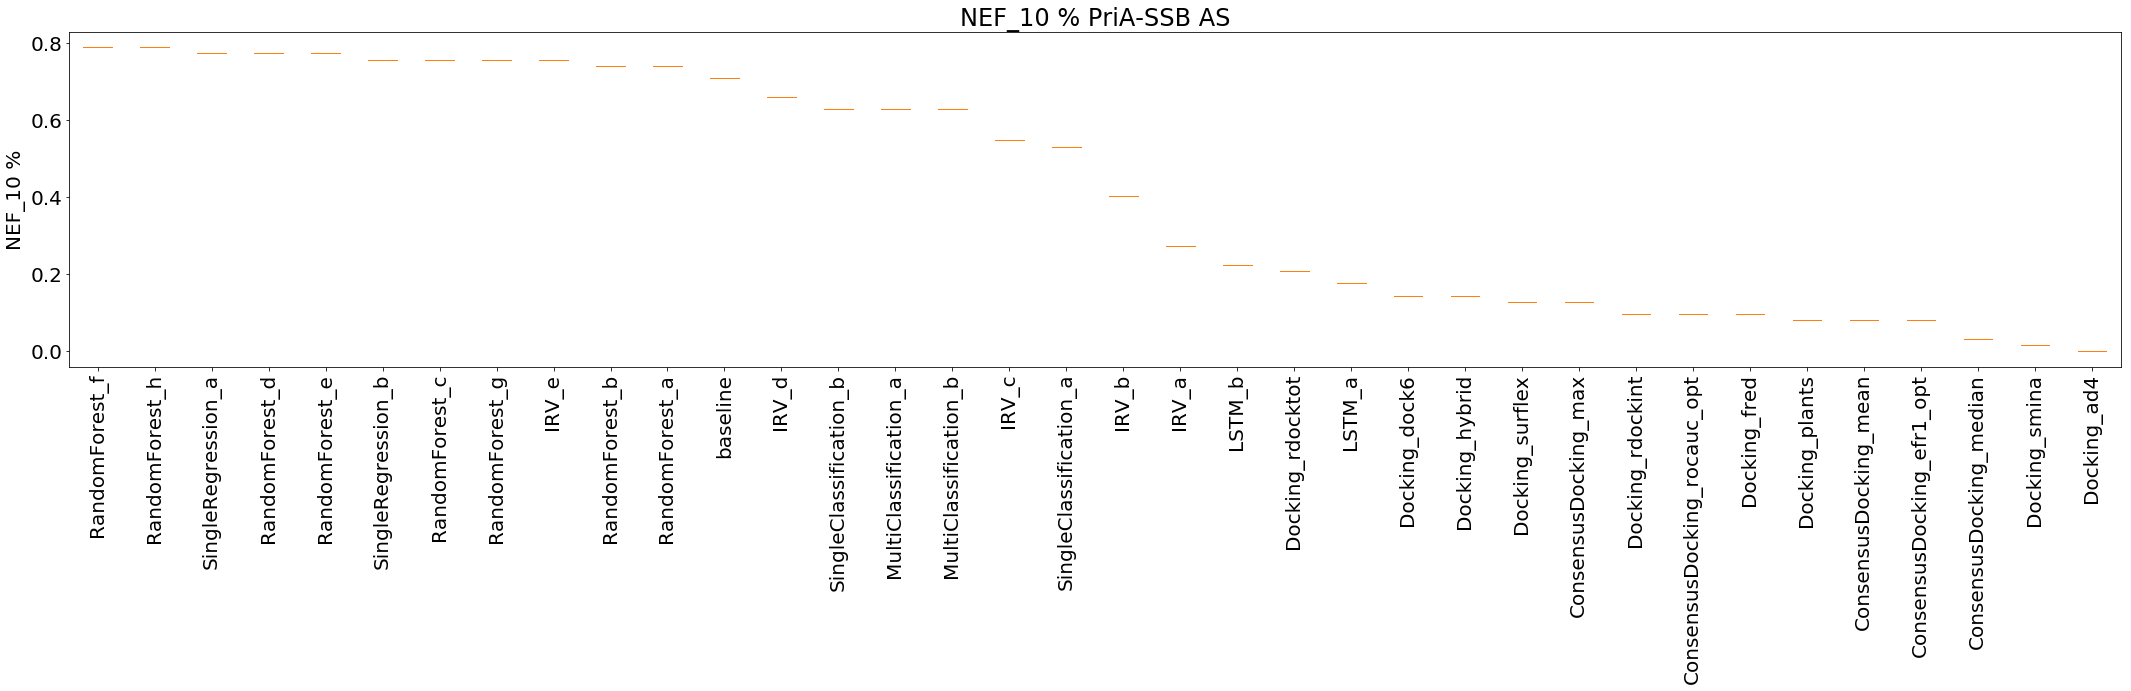

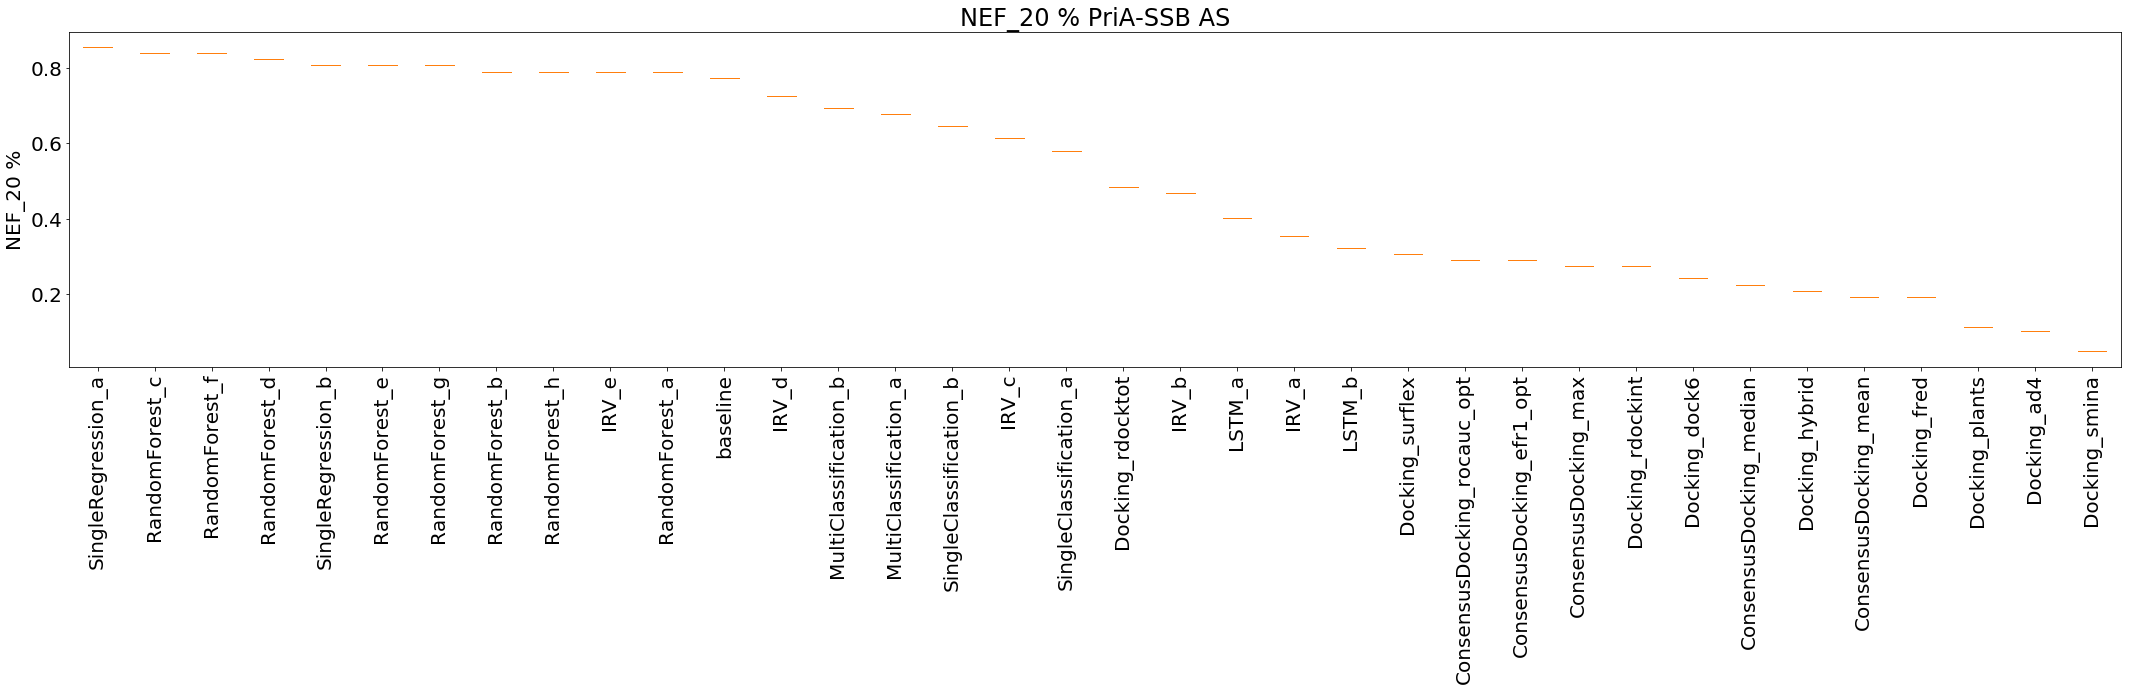

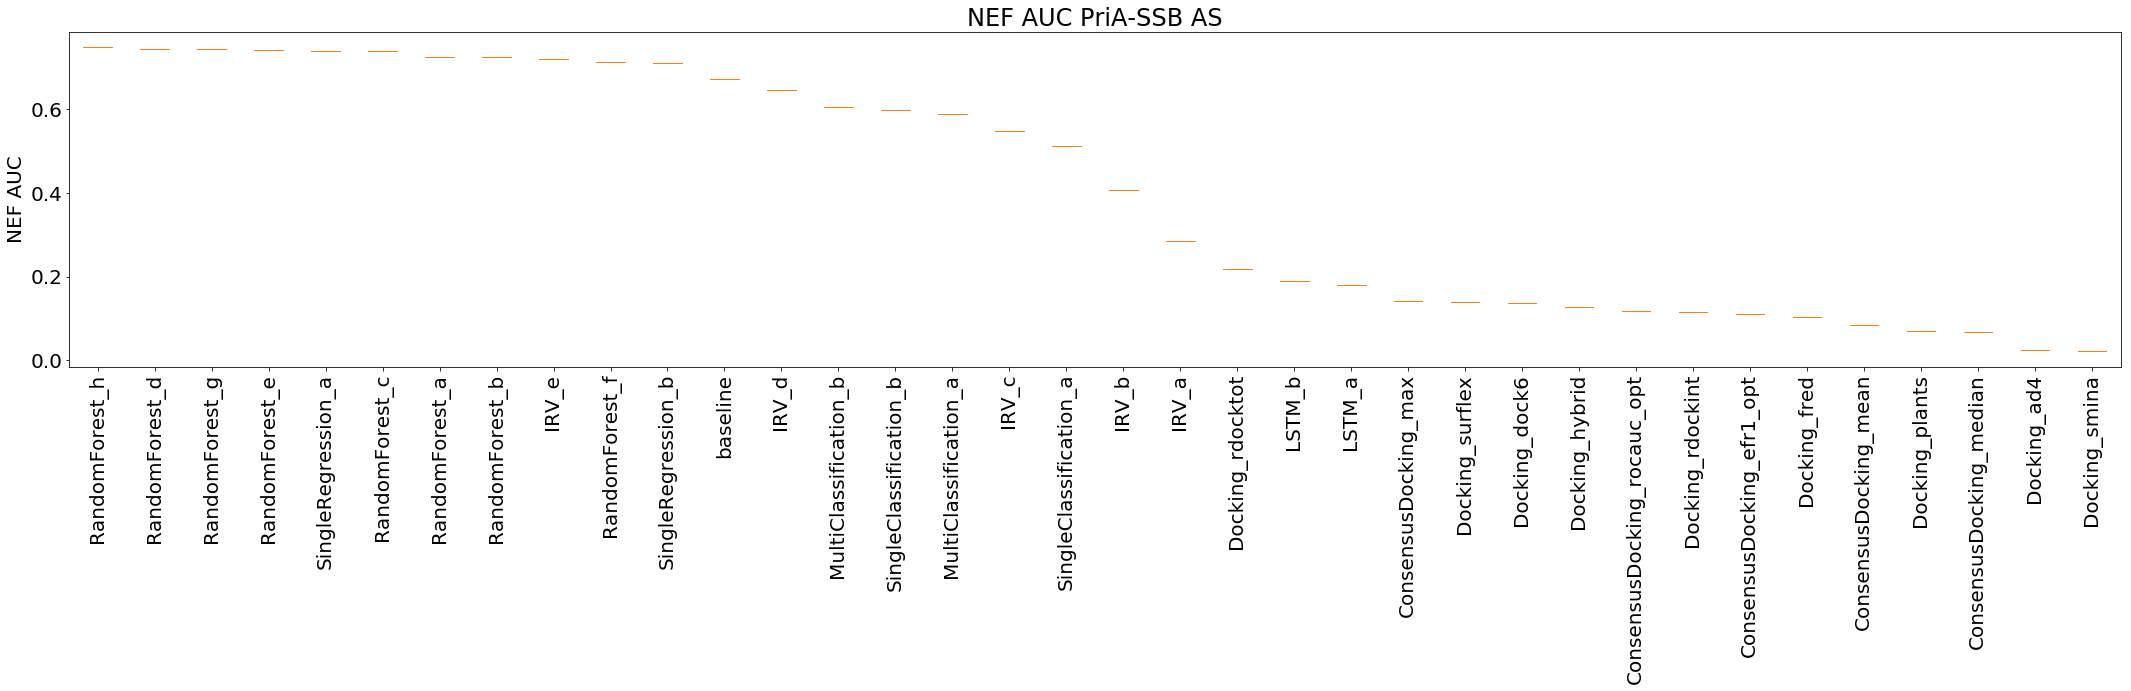

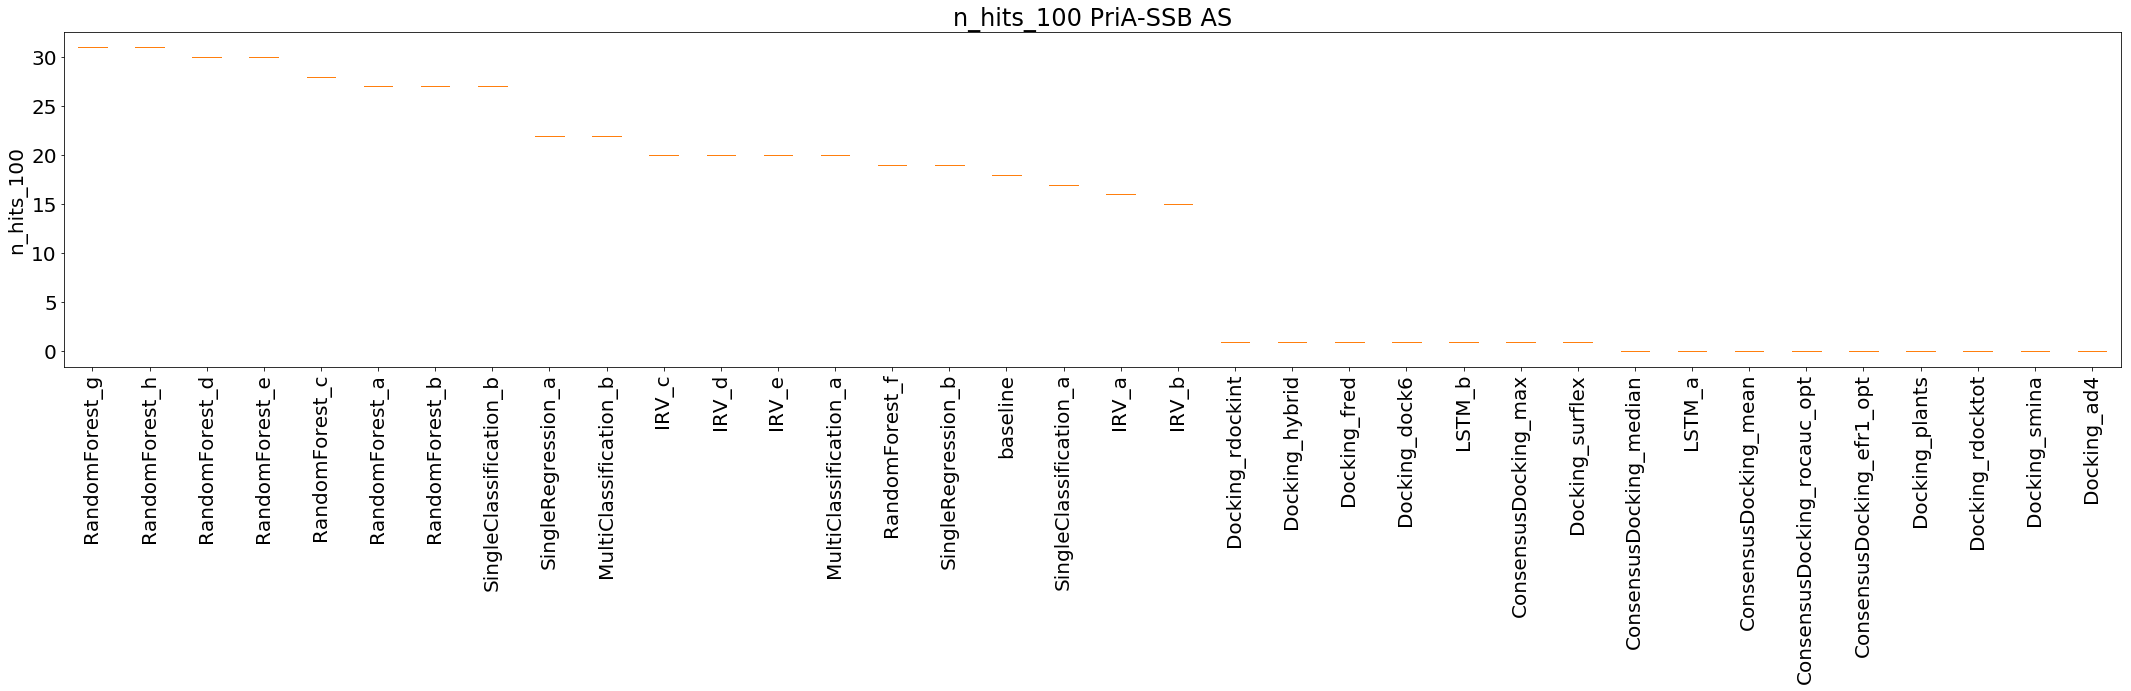

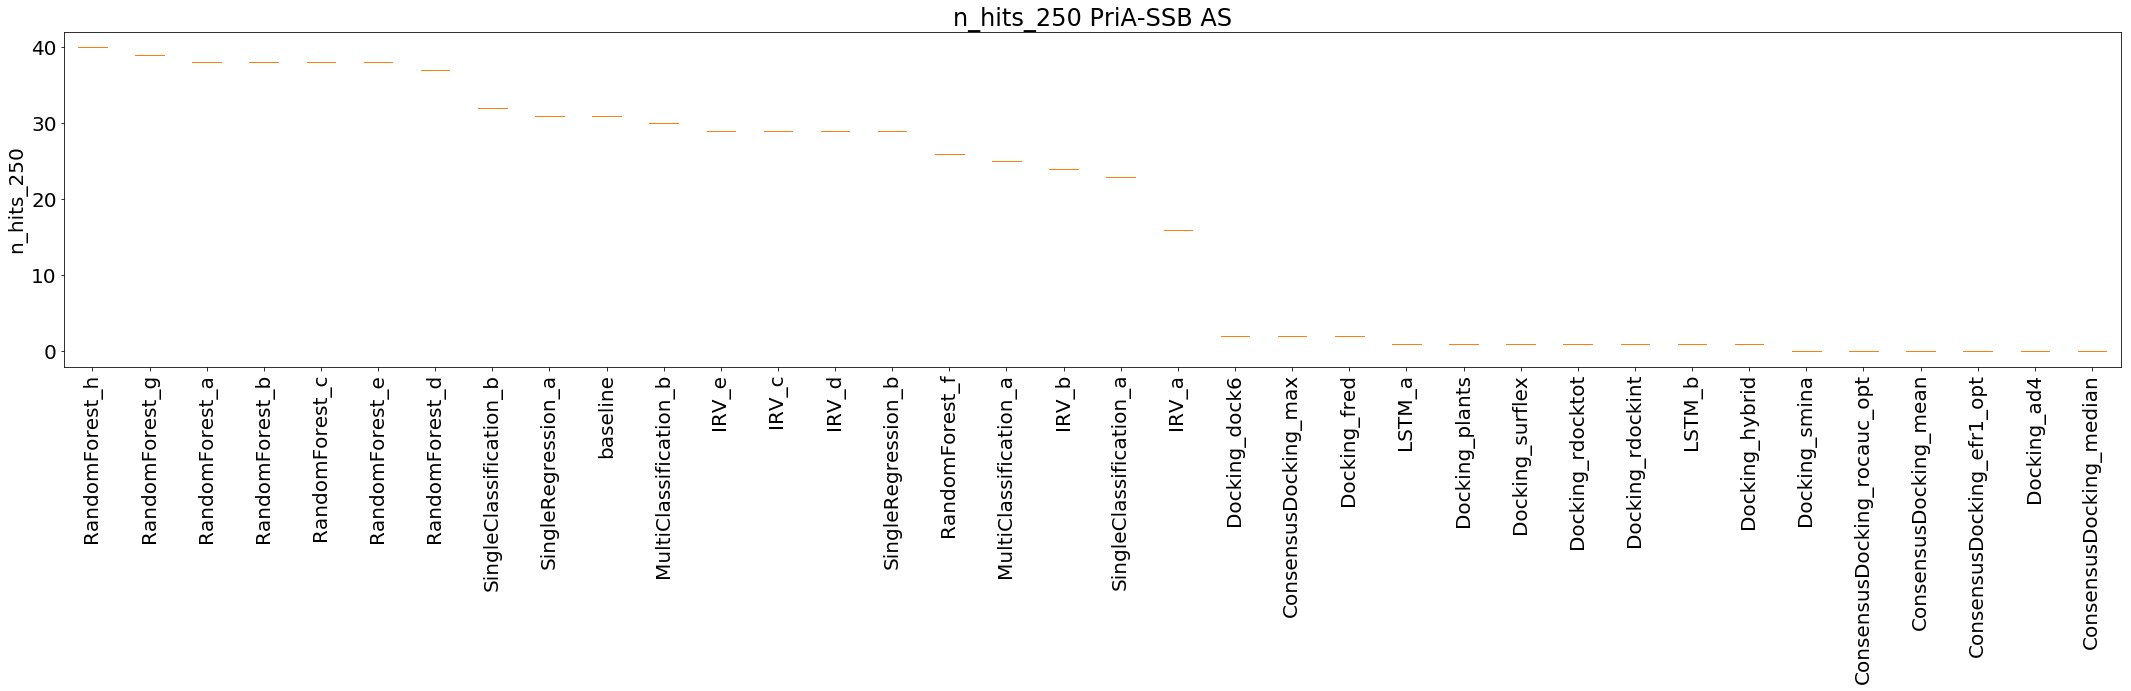

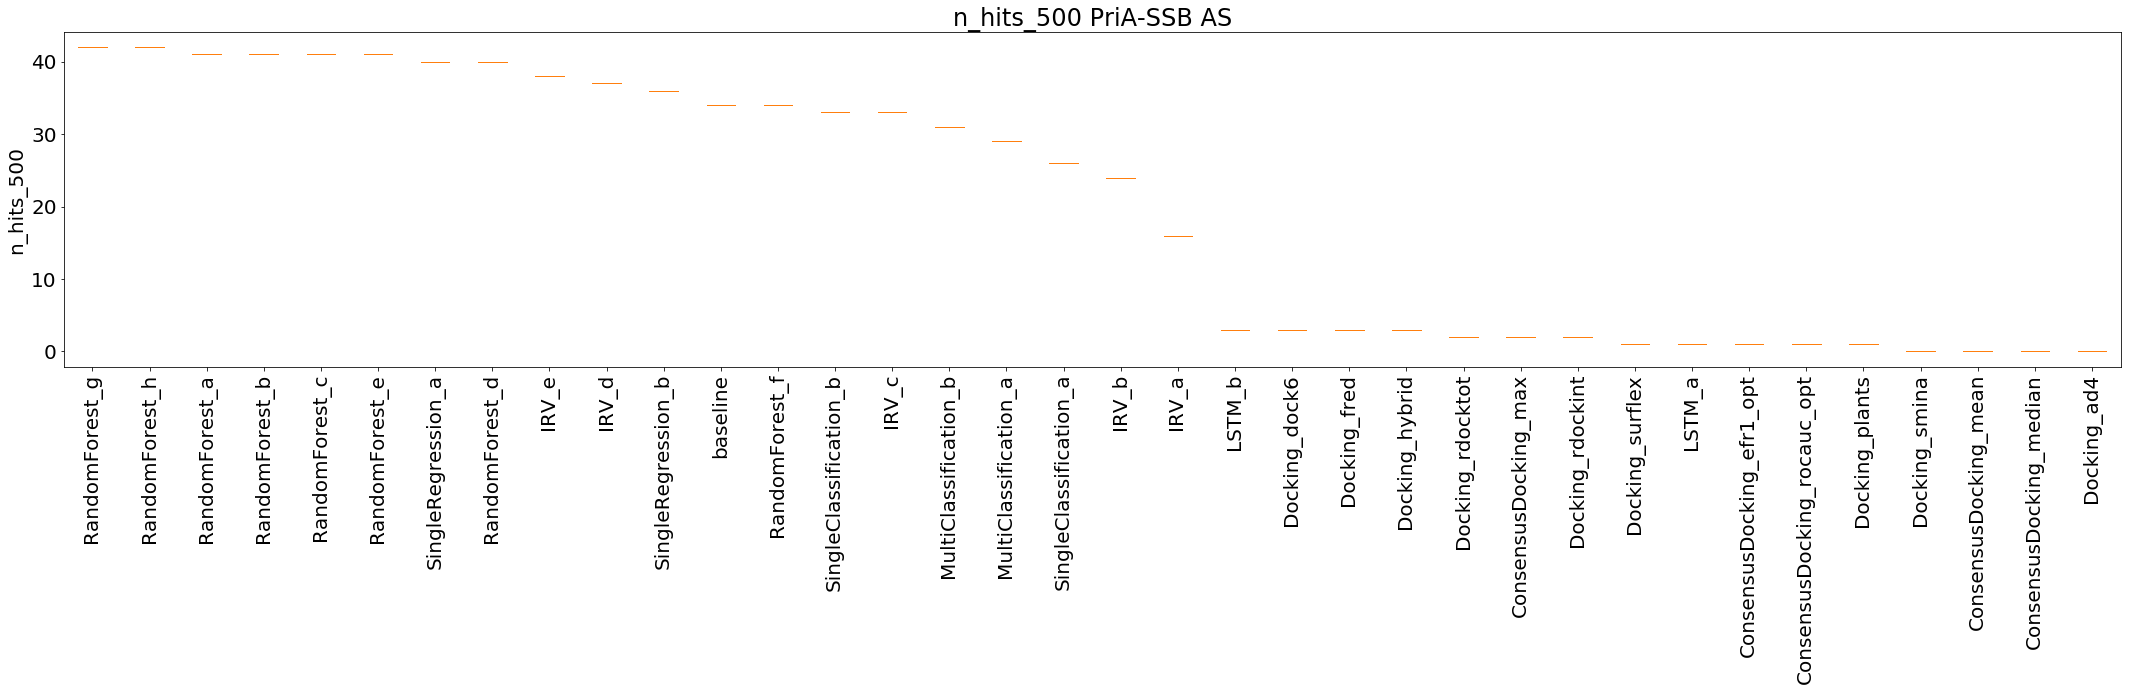

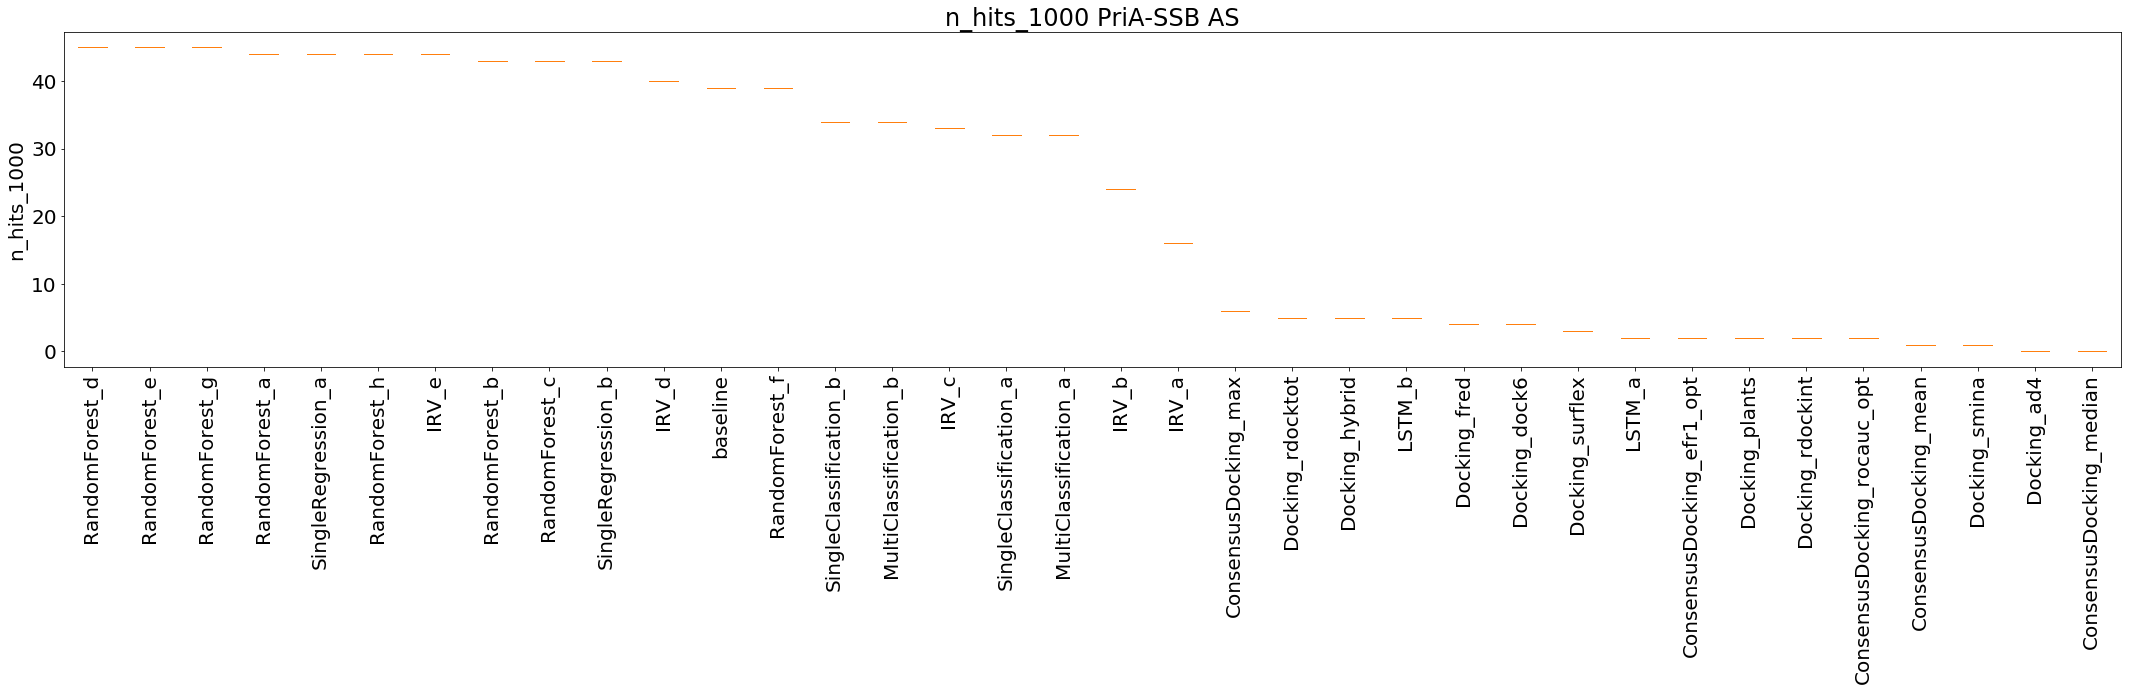

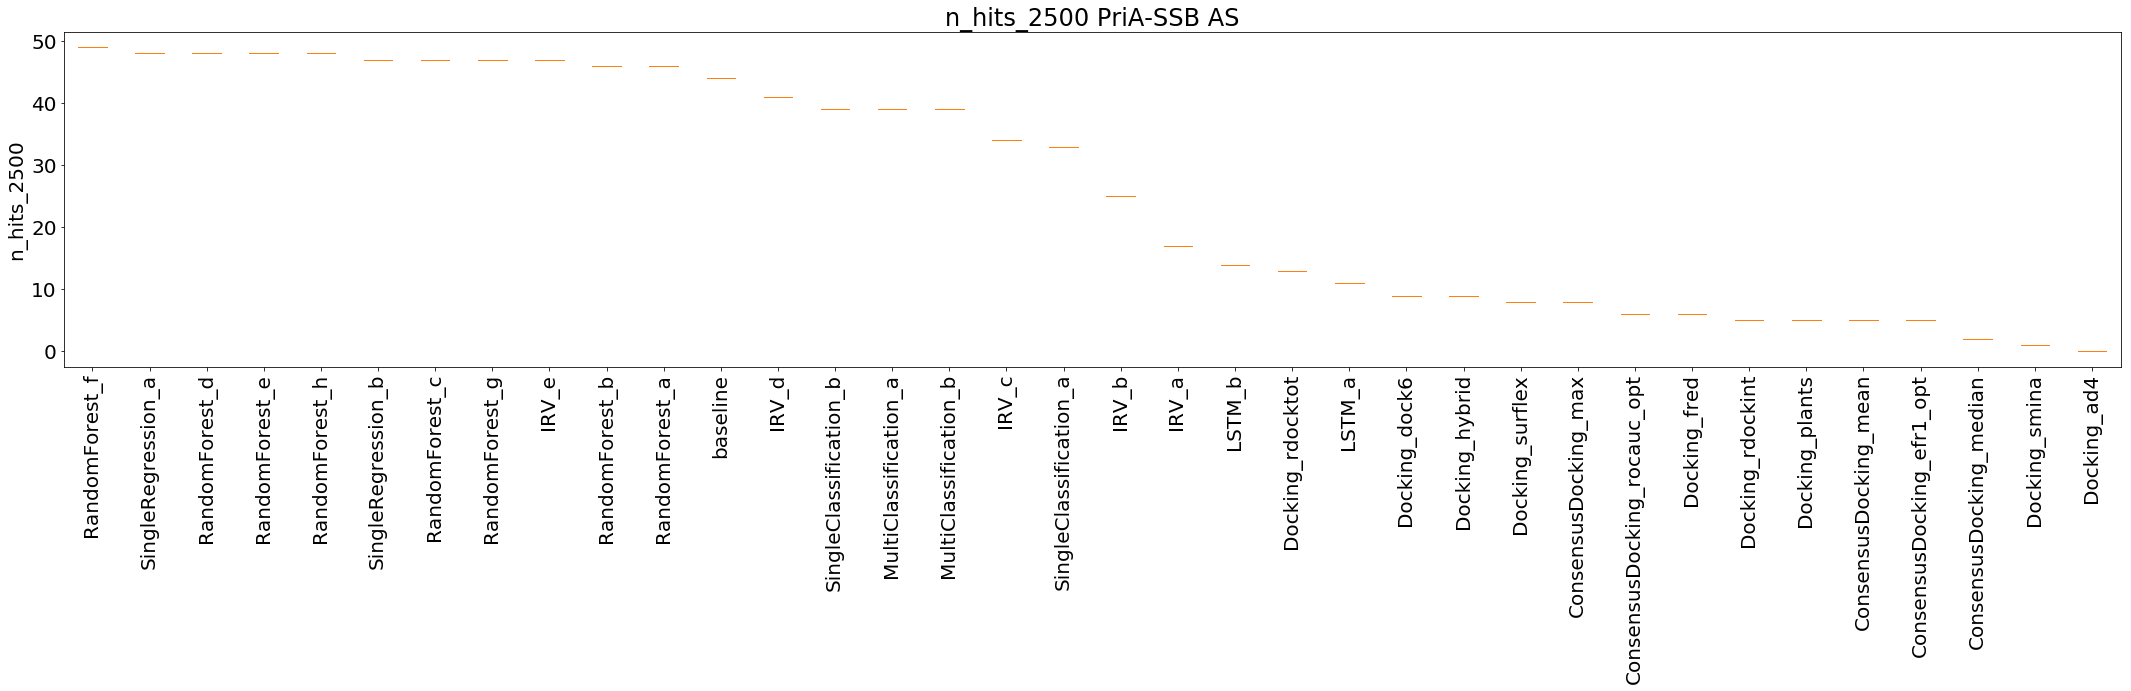

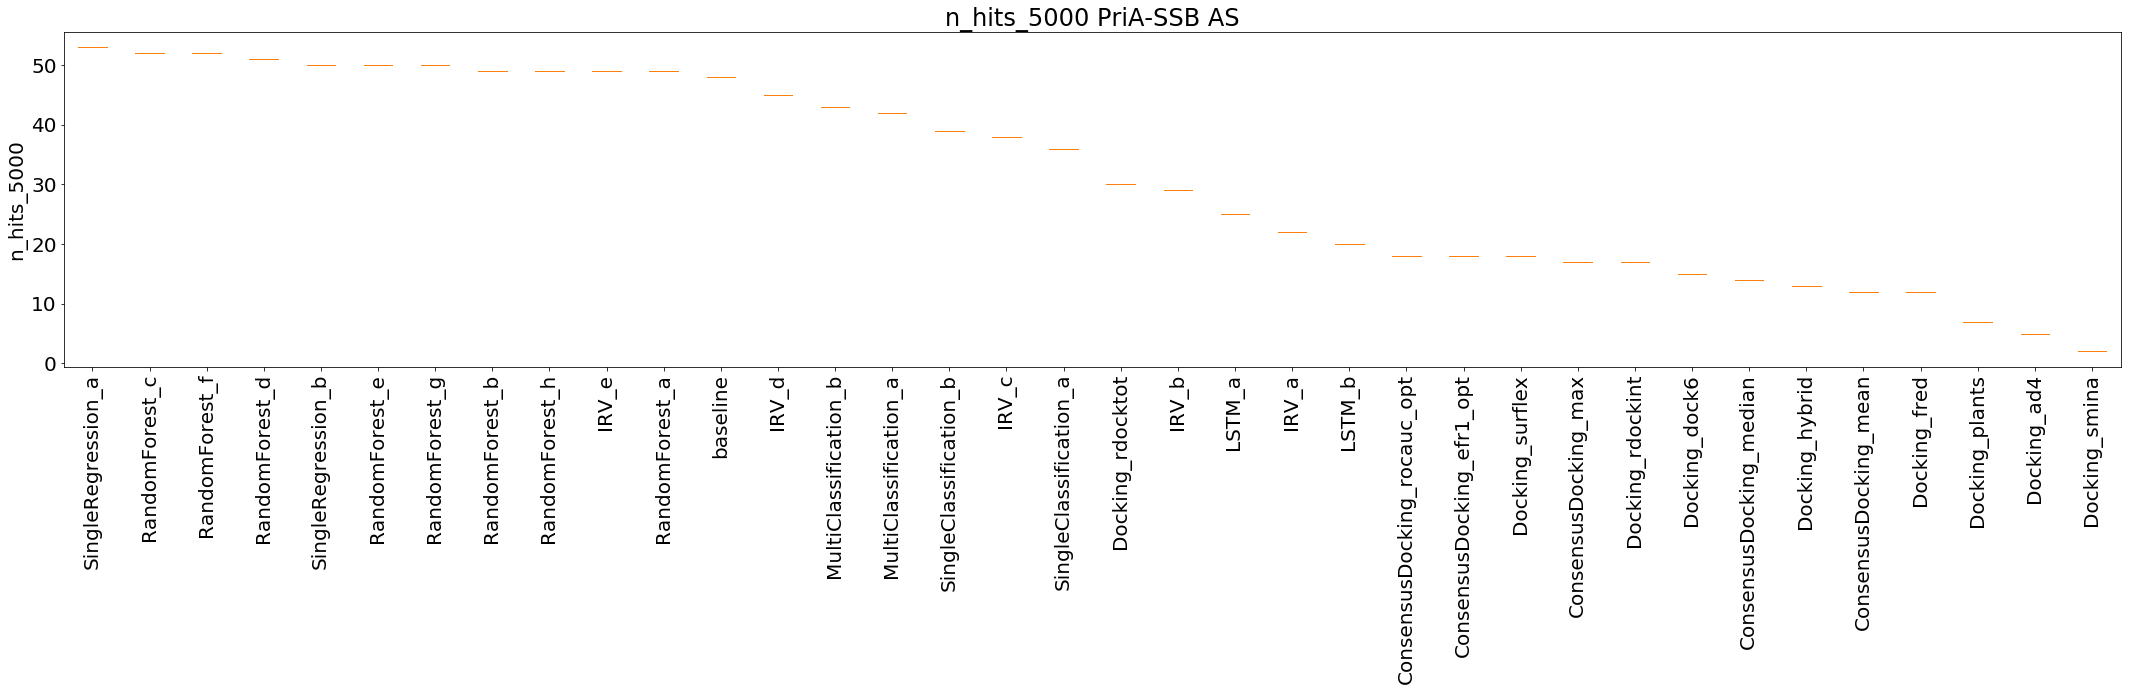

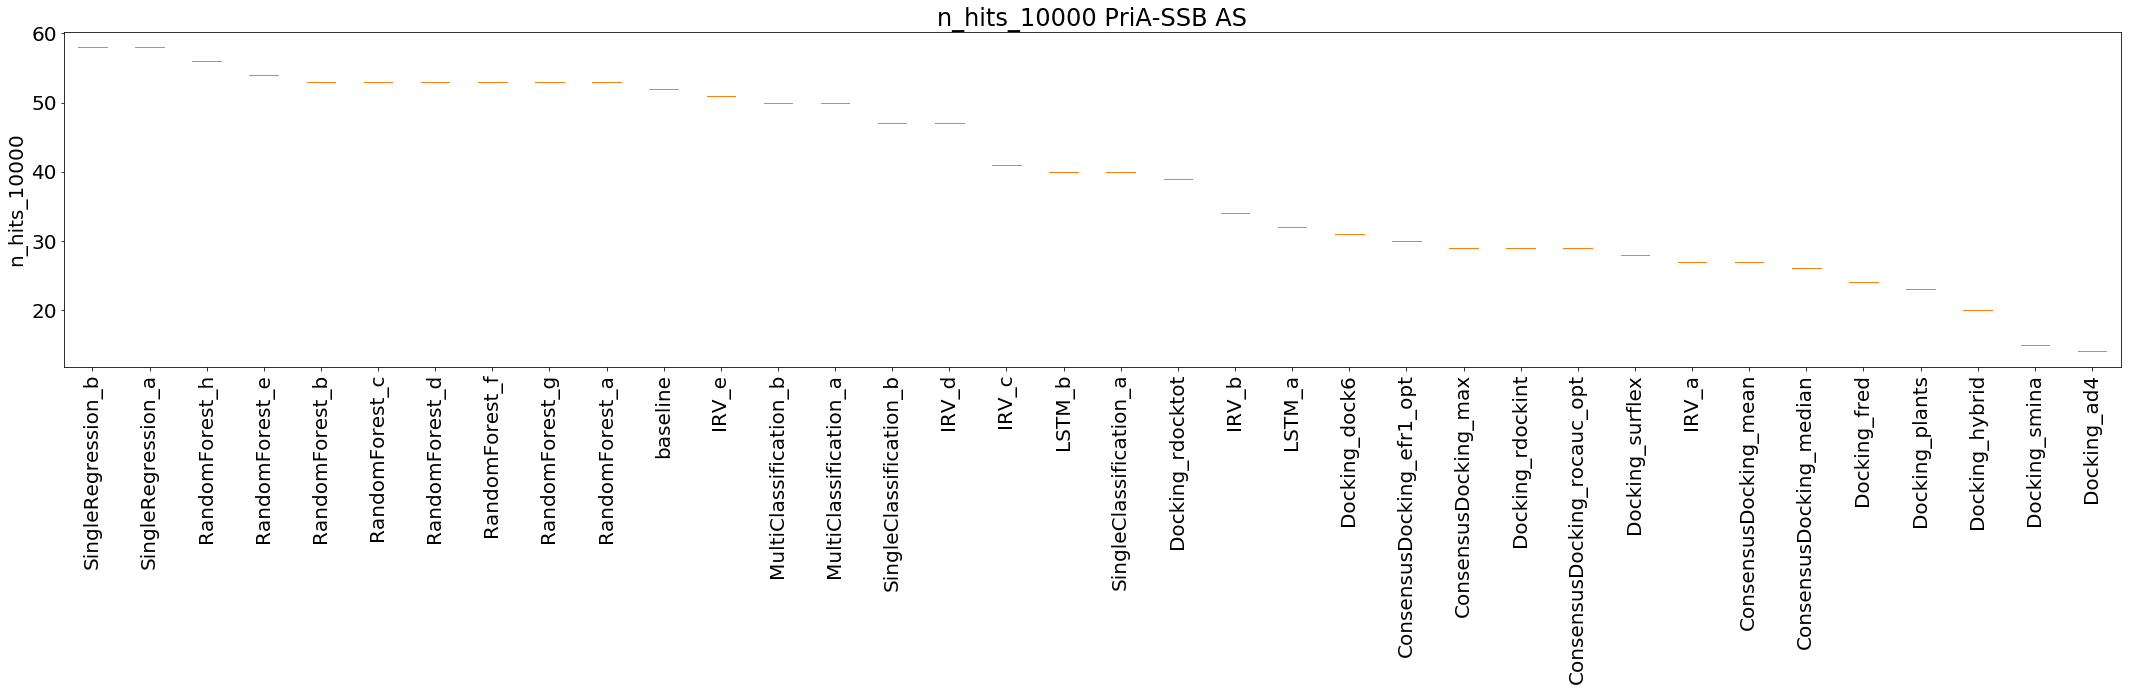

In [12]:
matplotlib.rcParams.update({'font.size': 20})
save_dir = './cv_ps_figures/ps_metric_plots_complete/'
labels=['PriA-SSB AS']
plot_metrics_bp(gather_df, metric_names, labels, save_dir)